# Reading given data

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df


,Date,Open,High,Low,Close,Volume
0,2004-12-31 20:00:00,1.35460,1.35860,1.35370,1.35710,409.0
1,2004-12-31 21:00:00,1.35720,1.35850,1.35600,1.35650,304.0
2,2004-12-31 22:00:00,1.35660,1.35710,1.35520,1.35540,272.0
3,2004-12-31 23:00:00,1.35540,1.35630,1.35520,1.35620,84.0
4,2005-01-03 01:00:00,1.35790,1.35810,1.35390,1.35470,318.0
...,...,...,...,...,...,...
126570,2025-08-04 07:00:00,1.15793,1.15855,1.15741,1.15748,1245.0
126571,2025-08-04 08:00:00,1.15748,1.15824,1.15668,1.15706,1925.0
126572,2025-08-04 09:00:00,1.15707,1.15834,1.15630,1.15718,3556.0
126573,2025-08-04 10:00:00,1.15719,1.15787,1.15506,1.15636,3699.0


# Making Features for the Model

## Session Labeling (Asian, NY, London) (Ordinal Encoding)

* The label is 0 when none of the sessions are trading in a given time
* The label is 1 when only 1 session is trading in a given time
* The label is 2 when only 2 sessions are trading in a given time
* The label is 3 when all 3 sessions are trading in a given time

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract time
df['Hour'] = df['Date'].dt.hour

def label_hour(h):
    if 0 <= h < 8:
        return 1
    elif 8 <= h < 9:
        return 2
    elif 9 <= h < 13:
        return 1
    elif 13 <= h < 17:
        return 2
    elif 17 <= h < 22:
        return 1
    elif 22 <= h <= 23:
        return 0

df['Session'] = df['Hour'].apply(label_hour)

df

,Date,Open,High,Low,Close,Volume,Hour,Session
0,2004-12-31 20:00:00,1.35460,1.35860,1.35370,1.35710,409.0,20,1
1,2004-12-31 21:00:00,1.35720,1.35850,1.35600,1.35650,304.0,21,1
2,2004-12-31 22:00:00,1.35660,1.35710,1.35520,1.35540,272.0,22,0
3,2004-12-31 23:00:00,1.35540,1.35630,1.35520,1.35620,84.0,23,0
4,2005-01-03 01:00:00,1.35790,1.35810,1.35390,1.35470,318.0,1,1
...,...,...,...,...,...,...,...,...
126570,2025-08-04 07:00:00,1.15793,1.15855,1.15741,1.15748,1245.0,7,1
126571,2025-08-04 08:00:00,1.15748,1.15824,1.15668,1.15706,1925.0,8,2
126572,2025-08-04 09:00:00,1.15707,1.15834,1.15630,1.15718,3556.0,9,1
126573,2025-08-04 10:00:00,1.15719,1.15787,1.15506,1.15636,3699.0,10,1


## Labeling Quarter (Ordinal Encoding)

* 1 for April, May, June
* 2 for July, August, Spetember
* 3 for October, November, December
* 4 for January, Febrauary, March

In [3]:
df['Month'] = df['Date'].dt.month

# Function to assign quarter labels
def label_quarter(m):
    if 1 <= m <= 3:
        return 1
    elif 4 <= m <= 6:
        return 2
    elif 7 <= m <= 9:
        return 3
    elif 10 <= m <= 12:
        return 4

# Apply function
df['Quarter'] = df['Month'].apply(label_quarter)

print(df)

                      Date     Open     High      Low    Close  Volume  Hour  \
0      2004-12-31 20:00:00  1.35460  1.35860  1.35370  1.35710   409.0    20   
1      2004-12-31 21:00:00  1.35720  1.35850  1.35600  1.35650   304.0    21   
2      2004-12-31 22:00:00  1.35660  1.35710  1.35520  1.35540   272.0    22   
3      2004-12-31 23:00:00  1.35540  1.35630  1.35520  1.35620    84.0    23   
4      2005-01-03 01:00:00  1.35790  1.35810  1.35390  1.35470   318.0     1   
...                    ...      ...      ...      ...      ...     ...   ...   
126570 2025-08-04 07:00:00  1.15793  1.15855  1.15741  1.15748  1245.0     7   
126571 2025-08-04 08:00:00  1.15748  1.15824  1.15668  1.15706  1925.0     8   
126572 2025-08-04 09:00:00  1.15707  1.15834  1.15630  1.15718  3556.0     9   
126573 2025-08-04 10:00:00  1.15719  1.15787  1.15506  1.15636  3699.0    10   
126574 2025-08-04 11:00:00  1.15637  1.15654  1.15495  1.15544  2637.0    11   

        Session  Month  Quarter  
0    

## Capturing the cyclic nature of Months, Date(1,2,...,31), Day of Week (Mon, Tue, Wed,...,Sun), Hour of the day (0,1,2,3,...,23)

* Applying sine transformation to the above mentioned fields so that the machine understands that december is closer to january than to June and other details hidden in DateTime in a similar fashion.
* Truncating the values upto 5 decimal points because the OHLCV is of the precision upto 5 decimal points

In [4]:
import numpy as np

# Apply sine transformation (cyclical encoding)
df['Month_sin'] = np.round(np.sin(2 * np.pi * df['Month'] / 12),5)

print(df)

                      Date     Open     High      Low    Close  Volume  Hour  \
0      2004-12-31 20:00:00  1.35460  1.35860  1.35370  1.35710   409.0    20   
1      2004-12-31 21:00:00  1.35720  1.35850  1.35600  1.35650   304.0    21   
2      2004-12-31 22:00:00  1.35660  1.35710  1.35520  1.35540   272.0    22   
3      2004-12-31 23:00:00  1.35540  1.35630  1.35520  1.35620    84.0    23   
4      2005-01-03 01:00:00  1.35790  1.35810  1.35390  1.35470   318.0     1   
...                    ...      ...      ...      ...      ...     ...   ...   
126570 2025-08-04 07:00:00  1.15793  1.15855  1.15741  1.15748  1245.0     7   
126571 2025-08-04 08:00:00  1.15748  1.15824  1.15668  1.15706  1925.0     8   
126572 2025-08-04 09:00:00  1.15707  1.15834  1.15630  1.15718  3556.0     9   
126573 2025-08-04 10:00:00  1.15719  1.15787  1.15506  1.15636  3699.0    10   
126574 2025-08-04 11:00:00  1.15637  1.15654  1.15495  1.15544  2637.0    11   

        Session  Month  Quarter  Month_

In [5]:
# Apply sine transformation and round to 5 decimals
df['Hour_sin'] = np.round(np.sin(2 * np.pi * df['Hour'] / 24), 5)

print(df)

                      Date     Open     High      Low    Close  Volume  Hour  \
0      2004-12-31 20:00:00  1.35460  1.35860  1.35370  1.35710   409.0    20   
1      2004-12-31 21:00:00  1.35720  1.35850  1.35600  1.35650   304.0    21   
2      2004-12-31 22:00:00  1.35660  1.35710  1.35520  1.35540   272.0    22   
3      2004-12-31 23:00:00  1.35540  1.35630  1.35520  1.35620    84.0    23   
4      2005-01-03 01:00:00  1.35790  1.35810  1.35390  1.35470   318.0     1   
...                    ...      ...      ...      ...      ...     ...   ...   
126570 2025-08-04 07:00:00  1.15793  1.15855  1.15741  1.15748  1245.0     7   
126571 2025-08-04 08:00:00  1.15748  1.15824  1.15668  1.15706  1925.0     8   
126572 2025-08-04 09:00:00  1.15707  1.15834  1.15630  1.15718  3556.0     9   
126573 2025-08-04 10:00:00  1.15719  1.15787  1.15506  1.15636  3699.0    10   
126574 2025-08-04 11:00:00  1.15637  1.15654  1.15495  1.15544  2637.0    11   

        Session  Month  Quarter  Month_

In [6]:
# Ensure Date column is datetime type
df["Date"] = pd.to_datetime(df["Date"])

# Extract only the day number (1–31)
df["Day"] = df["Date"].dt.day


# Apply sine transformation and round to 5 decimals
df['Date_sin'] = np.round(np.sin(2 * np.pi * df['Day'] / 30), 5)

print(df)




                      Date     Open     High      Low    Close  Volume  Hour  \
0      2004-12-31 20:00:00  1.35460  1.35860  1.35370  1.35710   409.0    20   
1      2004-12-31 21:00:00  1.35720  1.35850  1.35600  1.35650   304.0    21   
2      2004-12-31 22:00:00  1.35660  1.35710  1.35520  1.35540   272.0    22   
3      2004-12-31 23:00:00  1.35540  1.35630  1.35520  1.35620    84.0    23   
4      2005-01-03 01:00:00  1.35790  1.35810  1.35390  1.35470   318.0     1   
...                    ...      ...      ...      ...      ...     ...   ...   
126570 2025-08-04 07:00:00  1.15793  1.15855  1.15741  1.15748  1245.0     7   
126571 2025-08-04 08:00:00  1.15748  1.15824  1.15668  1.15706  1925.0     8   
126572 2025-08-04 09:00:00  1.15707  1.15834  1.15630  1.15718  3556.0     9   
126573 2025-08-04 10:00:00  1.15719  1.15787  1.15506  1.15636  3699.0    10   
126574 2025-08-04 11:00:00  1.15637  1.15654  1.15495  1.15544  2637.0    11   

        Session  Month  Quarter  Month_

In [7]:
# make sure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# get day of week (Monday=0, Sunday=6)
df["DOW"] = df["Date"].dt.weekday

# sine transformation (map 1–7 into a circle)
df["DOW_sin"] = np.sin(2 * np.pi * df["DOW"] / 7)

df


,Date,Open,High,Low,Close,Volume,Hour,Session,Month,Quarter,Month_sin,Hour_sin,Day,Date_sin,DOW,DOW_sin
0,2004-12-31 20:00:00,1.35460,1.35860,1.35370,1.35710,409.0,20,1,12,4,-0.00000,-0.86603,31,0.20791,4,-0.433884
1,2004-12-31 21:00:00,1.35720,1.35850,1.35600,1.35650,304.0,21,1,12,4,-0.00000,-0.70711,31,0.20791,4,-0.433884
2,2004-12-31 22:00:00,1.35660,1.35710,1.35520,1.35540,272.0,22,0,12,4,-0.00000,-0.50000,31,0.20791,4,-0.433884
3,2004-12-31 23:00:00,1.35540,1.35630,1.35520,1.35620,84.0,23,0,12,4,-0.00000,-0.25882,31,0.20791,4,-0.433884
4,2005-01-03 01:00:00,1.35790,1.35810,1.35390,1.35470,318.0,1,1,1,1,0.50000,0.25882,3,0.58779,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126570,2025-08-04 07:00:00,1.15793,1.15855,1.15741,1.15748,1245.0,7,1,8,3,-0.86603,0.96593,4,0.74314,0,0.000000
126571,2025-08-04 08:00:00,1.15748,1.15824,1.15668,1.15706,1925.0,8,2,8,3,-0.86603,0.86603,4,0.74314,0,0.000000
126572,2025-08-04 09:00:00,1.15707,1.15834,1.15630,1.15718,3556.0,9,1,8,3,-0.86603,0.70711,4,0.74314,0,0.000000
126573,2025-08-04 10:00:00,1.15719,1.15787,1.15506,1.15636,3699.0,10,1,8,3,-0.86603,0.50000,4,0.74314,0,0.000000


In [8]:
df = df.drop(["Hour", "Month", "Day", "DOW"], axis=1)
df

,Date,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,DOW_sin
0,2004-12-31 20:00:00,1.35460,1.35860,1.35370,1.35710,409.0,1,4,-0.00000,-0.86603,0.20791,-0.433884
1,2004-12-31 21:00:00,1.35720,1.35850,1.35600,1.35650,304.0,1,4,-0.00000,-0.70711,0.20791,-0.433884
2,2004-12-31 22:00:00,1.35660,1.35710,1.35520,1.35540,272.0,0,4,-0.00000,-0.50000,0.20791,-0.433884
3,2004-12-31 23:00:00,1.35540,1.35630,1.35520,1.35620,84.0,0,4,-0.00000,-0.25882,0.20791,-0.433884
4,2005-01-03 01:00:00,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.50000,0.25882,0.58779,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
126570,2025-08-04 07:00:00,1.15793,1.15855,1.15741,1.15748,1245.0,1,3,-0.86603,0.96593,0.74314,0.000000
126571,2025-08-04 08:00:00,1.15748,1.15824,1.15668,1.15706,1925.0,2,3,-0.86603,0.86603,0.74314,0.000000
126572,2025-08-04 09:00:00,1.15707,1.15834,1.15630,1.15718,3556.0,1,3,-0.86603,0.70711,0.74314,0.000000
126573,2025-08-04 10:00:00,1.15719,1.15787,1.15506,1.15636,3699.0,1,3,-0.86603,0.50000,0.74314,0.000000


## Using Alternate Data as features

### Interest Rate Differential of Yield-Par curve of 2Yr and 10Yr US Treasuary Bonds

* US has been selected because the data provided during the assignment did not contain any explicit mention of the currency pair. So, as a backup plan, US has been choosen because of the dependency of almost all currency pairs on it due to its importance as the primary global trading currency

The data for this has been taken from : "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value_month=202508"

In [9]:
rate_df = pd.read_csv('interest_rates.csv')
rate_df

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/24,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
1,12/30/24,4.43,4.42,4.37,4.33,4.25,4.17,4.24,4.29,4.37,4.46,4.55,4.84,4.77
2,12/27/24,4.44,4.43,4.31,4.35,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
3,12/26/24,4.45,4.45,4.35,4.37,4.31,4.23,4.30,4.35,4.42,4.49,4.58,4.83,4.76
4,12/24/24,4.44,4.44,4.40,4.38,4.30,4.24,4.29,4.36,4.43,4.52,4.59,4.84,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,1/8/90,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8753,1/5/90,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8754,1/4/90,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8755,1/3/90,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [10]:
import pandas as pd

# Convert Date to datetime
rate_df['Date'] = pd.to_datetime(rate_df['Date'], format='%m/%d/%y', errors='coerce')

# Create interest rate differential column (10 Yr - 2 Yr)
rate_df['Diff_10Y_2Y'] = (rate_df['10 Yr'] - rate_df['2 Yr'])/24

# keep a copy of original datetime
df['DateTime'] = df['Date']

# extract just the date (without time) for merging
df['Date'] = df['Date'].dt.date
rate_df['Date'] = rate_df['Date'].dt.date

# merge on just the date
merged = pd.merge(df, rate_df, on='Date', how='left')

# restore datetime with hours
merged['Date'] = merged['DateTime']
merged = merged.drop(columns=['Date'])

df = merged

df = df.drop(columns=['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'])

df = df.dropna()

df


,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,DOW_sin,DateTime,Diff_10Y_2Y
0,1.35460,1.35860,1.35370,1.35710,409.0,1,4,-0.0,-0.86603,0.20791,-0.433884,2004-12-31 20:00:00,0.048333
1,1.35720,1.35850,1.35600,1.35650,304.0,1,4,-0.0,-0.70711,0.20791,-0.433884,2004-12-31 21:00:00,0.048333
2,1.35660,1.35710,1.35520,1.35540,272.0,0,4,-0.0,-0.50000,0.20791,-0.433884,2004-12-31 22:00:00,0.048333
3,1.35540,1.35630,1.35520,1.35620,84.0,0,4,-0.0,-0.25882,0.20791,-0.433884,2004-12-31 23:00:00,0.048333
4,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.5,0.25882,0.58779,0.000000,2005-01-03 01:00:00,0.047083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122928,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,0.781831,2024-12-31 19:00:00,0.013750
122929,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,0.781831,2024-12-31 20:00:00,0.013750
122930,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,0.781831,2024-12-31 21:00:00,0.013750
122931,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,0.781831,2024-12-31 22:00:00,0.013750


### Oil and Gold

* It is often seen that the currency values changes majorly when major global trading commodities such as oil and Gold change.
* They can be seen as a leading indicator of volume and change in price for the forex trading pairs.

The data for Gold has been taken from : "https://www.kaggle.com/datasets/novandraanugrah/xauusd-gold-price-historical-data-2004-2024"

The data for oil has been taken from : "https://finance.yahoo.com/quote/CL%3DF/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAHBu3O2YAG4BmOqSpxUDAQmwfsfej5nBk9-VmpIWBpBNgHZ1tYYoD_v3BTwELQ3cousJCEKhSI3XsDuRq6vgSSFUHkx4tDVdKSnRKkPws55F1t8K4QRVCnjfk9AGgPfoaR9Yaxt6TvQATiAjAZwx17brwzdzjm01jDiV98-3sGo6"

In [11]:
oil_df = pd.read_csv('oil.csv')
oil_df = oil_df.rename(columns={
    "Volume": "Oil_Volume",
    "Adj Close": "Oil_Close"
})


oil_df

,Date,Oil_Volume,Oil_Close
0,"Aug 21, 2025",196698,63.50
1,"Aug 20, 2025",99484,63.21
2,"Aug 19, 2025",99484,62.35
3,"Aug 18, 2025",95113,63.42
4,"Aug 15, 2025",197390,62.80
...,...,...,...
6271,"Aug 29, 2000",49131,32.72
6272,"Aug 28, 2000",46770,32.87
6273,"Aug 25, 2000",44601,32.05
6274,"Aug 24, 2000",72978,31.63


In [12]:
import pandas as pd

# Convert both to datetime64[ns]
oil_df['Date'] = pd.to_datetime(oil_df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['DateTime']).dt.normalize()  # strips time, keeps dtype datetime64[ns]

# Now merge
newmerge = pd.merge(df, oil_df, on='Date', how='left')

newmerge = newmerge.drop(columns=['Date'])

df = newmerge

df = df.dropna()

df['Oil_Volume'] = (df['Oil_Volume']/24)

df


/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_16708/2363661686.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Oil_Volume'] = (df['Oil_Volume']/24)


,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,DOW_sin,DateTime,Diff_10Y_2Y,Oil_Volume,Oil_Close
4,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.5,0.25882,0.58779,0.000000,2005-01-03 01:00:00,0.047083,2895.166667,42.12
5,1.35460,1.35510,1.35290,1.35380,338.0,1,1,0.5,0.50000,0.58779,0.000000,2005-01-03 02:00:00,0.047083,2895.166667,42.12
6,1.35390,1.35390,1.34980,1.35040,356.0,1,1,0.5,0.70711,0.58779,0.000000,2005-01-03 03:00:00,0.047083,2895.166667,42.12
7,1.35040,1.35060,1.33850,1.33990,545.0,1,1,0.5,0.86603,0.58779,0.000000,2005-01-03 04:00:00,0.047083,2895.166667,42.12
8,1.33990,1.34450,1.33990,1.34430,385.0,1,1,0.5,0.96593,0.58779,0.000000,2005-01-03 05:00:00,0.047083,2895.166667,42.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118627,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,0.781831,2024-12-31 19:00:00,0.013750,6298.125000,71.72
118628,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,0.781831,2024-12-31 20:00:00,0.013750,6298.125000,71.72
118629,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,0.781831,2024-12-31 21:00:00,0.013750,6298.125000,71.72
118630,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,0.781831,2024-12-31 22:00:00,0.013750,6298.125000,71.72


In [13]:
gold_df = pd.read_csv('gold.csv', sep=";")
gold_df

,Date,Open,High,Low,Close,Volume
0,2004.06.11 07:00,384.00,384.30,383.30,383.80,44
1,2004.06.11 08:00,383.80,384.30,383.10,383.10,41
2,2004.06.11 09:00,383.10,384.10,382.80,383.10,55
3,2004.06.11 10:00,383.00,383.80,383.00,383.60,33
4,2004.06.11 11:00,383.60,383.80,383.50,383.60,23
...,...,...,...,...,...,...
122651,2025.07.15 15:00,3354.84,3360.22,3346.34,3348.77,55313
122652,2025.07.15 16:00,3348.78,3352.36,3334.35,3346.50,79108
122653,2025.07.15 17:00,3346.49,3352.05,3342.43,3347.89,54849
122654,2025.07.15 18:00,3347.88,3349.87,3325.34,3328.88,63341


In [14]:
gold_df = gold_df.drop(columns=['Open', 'High', 'Low', 'Volume'])

gold_df = gold_df.rename(columns={
    "Close": "Gold_Close",
    "Date":"DateTime"
})

# Convert gold_df['Date'] to proper datetime
gold_df['DateTime'] = pd.to_datetime(gold_df['DateTime'], format="%Y.%m.%d %H:%M", errors="coerce")

# Merge on DateOnly
merged = pd.merge(df, gold_df, on='DateTime', how='left')

df = merged

df = df.dropna()

df





,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,DOW_sin,DateTime,Diff_10Y_2Y,Oil_Volume,Oil_Close,Gold_Close
0,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.5,0.25882,0.58779,0.000000,2005-01-03 01:00:00,0.047083,2895.166667,42.12,435.60
1,1.35460,1.35510,1.35290,1.35380,338.0,1,1,0.5,0.50000,0.58779,0.000000,2005-01-03 02:00:00,0.047083,2895.166667,42.12,435.50
2,1.35390,1.35390,1.34980,1.35040,356.0,1,1,0.5,0.70711,0.58779,0.000000,2005-01-03 03:00:00,0.047083,2895.166667,42.12,435.00
3,1.35040,1.35060,1.33850,1.33990,545.0,1,1,0.5,0.86603,0.58779,0.000000,2005-01-03 04:00:00,0.047083,2895.166667,42.12,433.60
4,1.33990,1.34450,1.33990,1.34430,385.0,1,1,0.5,0.96593,0.58779,0.000000,2005-01-03 05:00:00,0.047083,2895.166667,42.12,433.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,0.781831,2024-12-31 19:00:00,0.013750,6298.125000,71.72,2624.38
118389,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,0.781831,2024-12-31 20:00:00,0.013750,6298.125000,71.72,2624.81
118390,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,0.781831,2024-12-31 21:00:00,0.013750,6298.125000,71.72,2623.85
118391,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,0.781831,2024-12-31 22:00:00,0.013750,6298.125000,71.72,2623.36


## Technical Indicators

* I have chosen only bounded indicators because i do not want the machine to get confused.
* All the chosen Indicators are selected keeping in mind that their primary function is to help understand the machine the nature of the market when combined with the previously made features.

* The Features selected can be broadly classified into 3 categories:

  * Trend :
    * ADX - Average Directional Index (Strength Only)
    * CCI - Commodity Channel Index (Strength and Direction)
  
  * Momentum :
    * PPO - Percent Price Oscillator (Strength and Direction)
    * CMO - Chande Momentum Oscillator (Strength and Direction)

  * Volatility:
    * Chaikin Volatility (Intra-Bar)
    * Keltner Channel Width (Inter-Bar)

* Here I am calculating them and then in order to find the most responsive lookback periods, graphs showing ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Factor)

* Based on ACF, PACF and standard lookback periods, we will calculate indicators for multiple lookback periods.

* Based on all these indicators, new secondary indicators will be calculated from primary features to catch as micro market structures and repetitive macro market structures

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/3209065174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_14'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/3209065174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI_14'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/3209065174.py:11: SettingWithCopyWarni

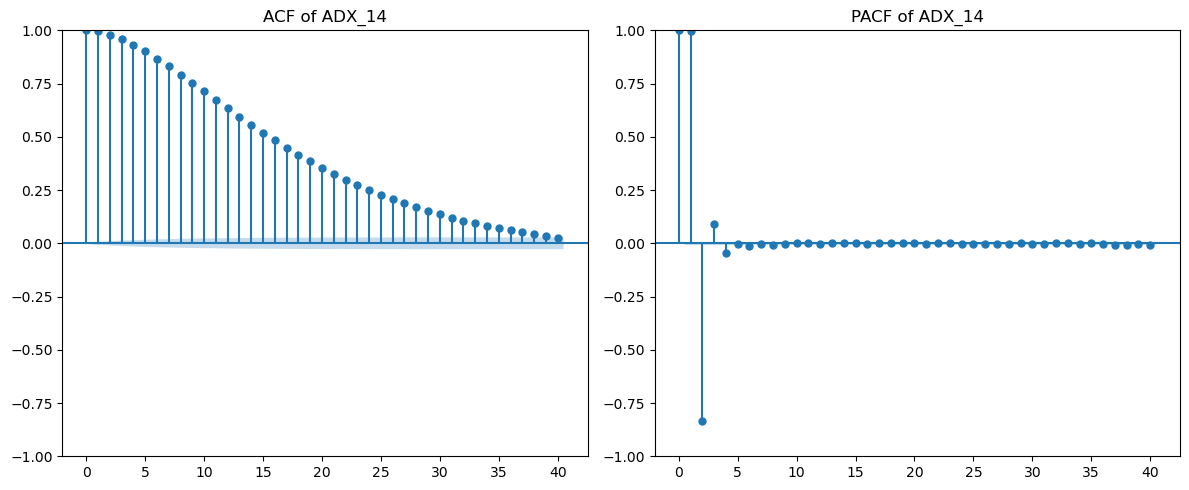

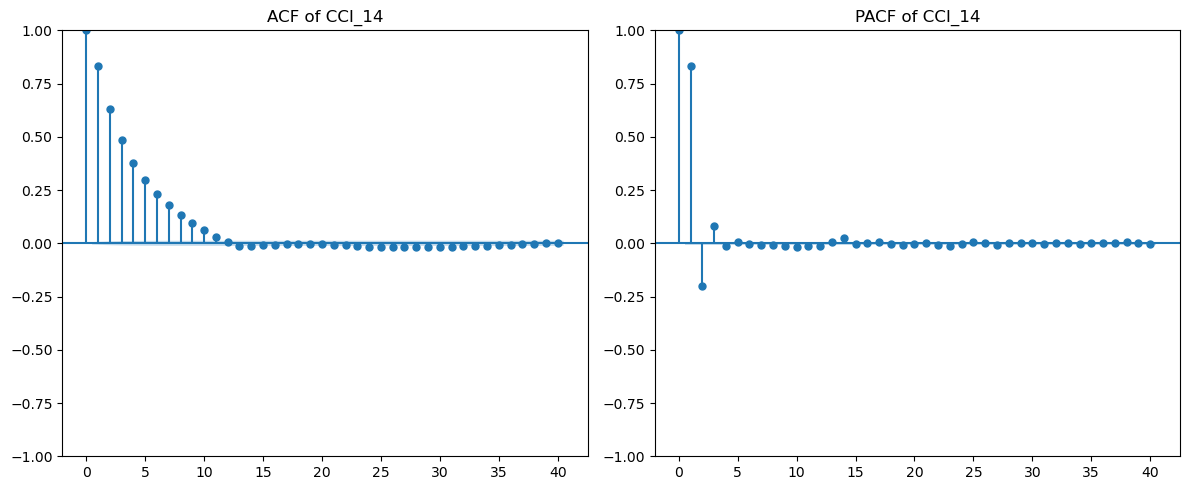

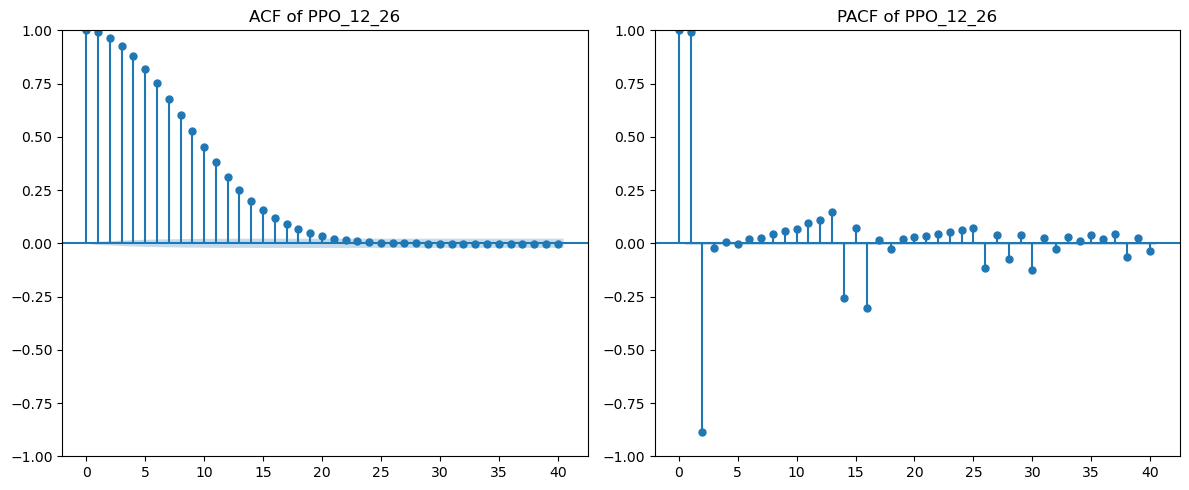

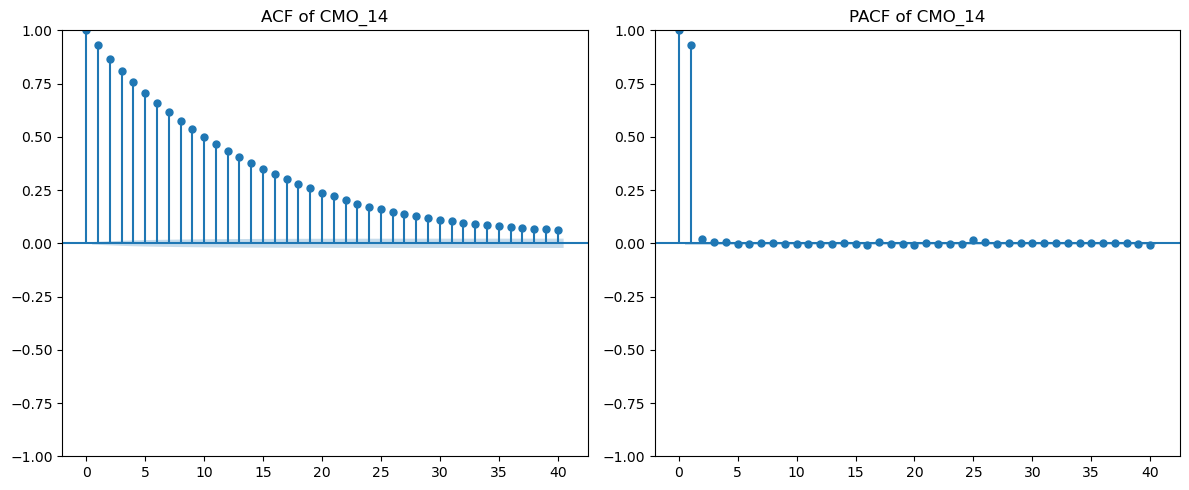

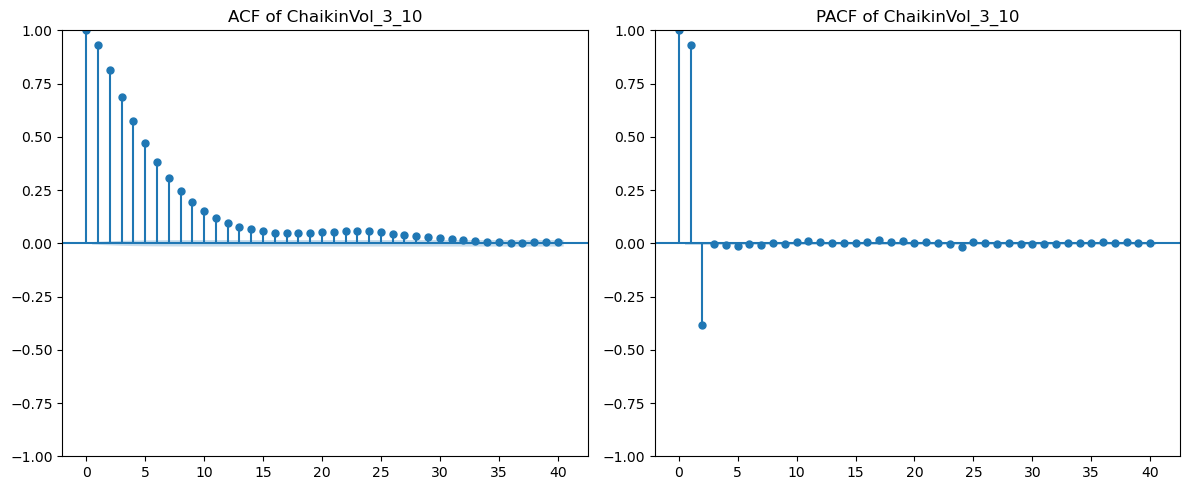

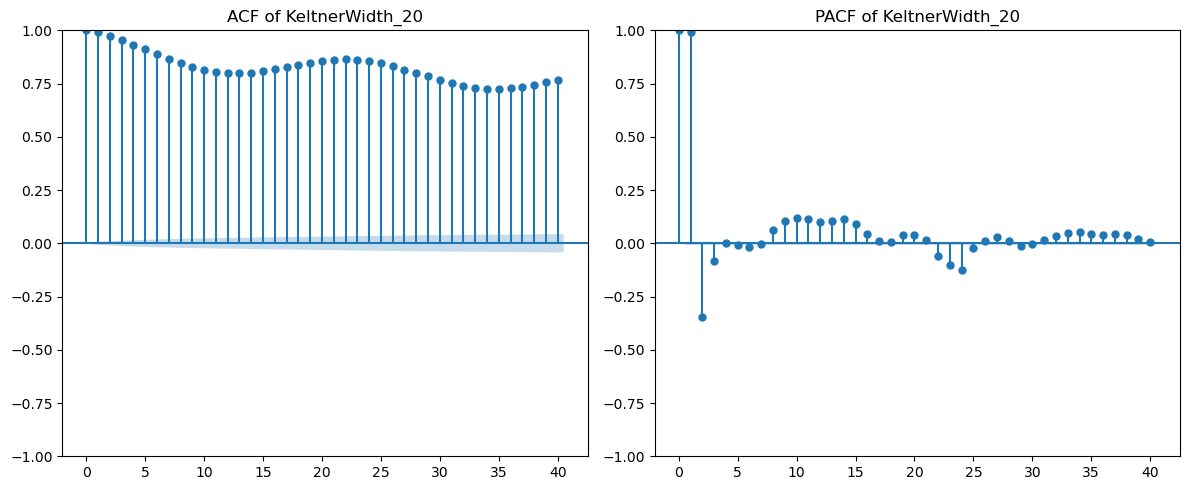

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import talib

# Example: df contains columns ['Open', 'High', 'Low', 'Close', 'Volume']

# Compute indicators using TA-Lib
df['ADX_14'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['CCI_14'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['PPO_12_26'] = talib.PPO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
df['CMO_14'] = talib.CMO(df['Close'], timeperiod=14)
df['ChaikinVol_3_10'] = talib.ADOSC(df['High'], df['Low'], df['Close'], df['Volume'], fastperiod=3, slowperiod=10)
df['KeltnerWidth_20'] = (talib.EMA(df['High'] - df['Low'], timeperiod=20) / talib.EMA(df['Close'], timeperiod=20))

# Select only indicator columns
indicators = ['ADX_14', 'CCI_14', 'PPO_12_26', 'CMO_14', 'ChaikinVol_3_10', 'KeltnerWidth_20']

# Loop through each indicator and plot ACF + PACF
for ind in indicators:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plot_acf(df[ind].dropna(), lags=40, ax=plt.gca())
    plt.title(f'ACF of {ind}')

    plt.subplot(1, 2, 2)
    plot_pacf(df[ind].dropna(), lags=40, ax=plt.gca(), method='ywm')
    plt.title(f'PACF of {ind}')

    plt.tight_layout()
    plt.show()


In [119]:
df

,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,...,Diff_10Y_2Y,Oil_Volume,Oil_Close,Gold_Close,ADX_14,CCI_14,PPO_12_26,CMO_14,ChaikinVol_3_10,KeltnerWidth_20
0,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.5,0.25882,0.58779,...,0.047083,2895.166667,42.12,435.60,NaN,NaN,NaN,NaN,NaN,NaN
1,1.35460,1.35510,1.35290,1.35380,338.0,1,1,0.5,0.50000,0.58779,...,0.047083,2895.166667,42.12,435.50,NaN,NaN,NaN,NaN,NaN,NaN
2,1.35390,1.35390,1.34980,1.35040,356.0,1,1,0.5,0.70711,0.58779,...,0.047083,2895.166667,42.12,435.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1.35040,1.35060,1.33850,1.33990,545.0,1,1,0.5,0.86603,0.58779,...,0.047083,2895.166667,42.12,433.60,NaN,NaN,NaN,NaN,NaN,NaN
4,1.33990,1.34450,1.33990,1.34430,385.0,1,1,0.5,0.96593,0.58779,...,0.047083,2895.166667,42.12,433.60,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,...,0.013750,6298.125000,71.72,2624.38,23.611404,-160.337614,-0.051720,-49.033438,-2699.177784,0.001465
118389,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,...,0.013750,6298.125000,71.72,2624.81,25.551370,-119.355906,-0.082496,-43.107288,-2306.287257,0.001427
118390,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,...,0.013750,6298.125000,71.72,2623.85,26.385304,-85.267741,-0.116771,-40.333690,-2174.693523,0.001410
118391,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,...,0.013750,6298.125000,71.72,2623.36,27.159672,-69.016843,-0.151568,-34.860425,-1971.758013,0.001356


In [120]:
df['ADX_2'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=2)
df['ADX_5'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=5)
df['CCI_2'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=2)
df['CCI_8'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=8)
df['CCI_20'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)
df['PPO_2_6'] = talib.PPO(df['Close'], fastperiod=2, slowperiod=6, matype=0)
df['CMO_2'] = talib.CMO(df['Close'], timeperiod=2)
df['CMO54'] = talib.CMO(df['Close'], timeperiod=5)
df['ChaikinVol_2_5'] = talib.ADOSC(df['High'], df['Low'], df['Close'], df['Volume'], fastperiod=2, slowperiod=5)
df['KeltnerWidth_2'] = (talib.EMA(df['High'] - df['Low'], timeperiod=2) / talib.EMA(df['Close'], timeperiod=2))
df['KeltnerWidth_15'] = (talib.EMA(df['High'] - df['Low'], timeperiod=15) / talib.EMA(df['Close'], timeperiod=15))
df['KeltnerWidth_24'] = (talib.EMA(df['High'] - df['Low'], timeperiod=24) / talib.EMA(df['Close'], timeperiod=24))

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/1728166818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_2'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=2)
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/1728166818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_5'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=5)
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/1728166818.py:3: SettingWithCopyWarning: 
A

In [121]:
df

,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,...,CCI_2,CCI_8,CCI_20,PPO_2_6,CMO_2,CMO54,ChaikinVol_2_5,KeltnerWidth_2,KeltnerWidth_15,KeltnerWidth_24
0,1.35790,1.35810,1.35390,1.35470,318.0,1,1,0.5,0.25882,0.58779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.35460,1.35510,1.35290,1.35380,338.0,1,1,0.5,0.50000,0.58779,...,-66.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.002363,NaN,NaN
2,1.35390,1.35390,1.34980,1.35040,356.0,1,1,0.5,0.70711,0.58779,...,-66.666667,NaN,NaN,NaN,-100.000000,NaN,NaN,0.002811,NaN,NaN
3,1.35040,1.35060,1.33850,1.33990,545.0,1,1,0.5,0.86603,0.58779,...,-66.666667,NaN,NaN,NaN,-100.000000,NaN,NaN,0.006945,NaN,NaN
4,1.33990,1.34450,1.33990,1.34430,385.0,1,1,0.5,0.96593,0.58779,...,-66.666667,NaN,NaN,NaN,-17.948718,NaN,-99.117404,0.004596,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,...,-66.666667,-108.467310,-217.330577,-0.188861,-99.184418,-86.385833,-1741.904757,0.001345,0.001520,0.001433
118389,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,...,66.666667,-76.572200,-161.486199,-0.112263,-18.839266,-65.275344,-1063.099374,0.001163,0.001464,0.001404
118390,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,...,66.666667,-46.257822,-118.798827,-0.023335,13.404055,-55.138058,-926.177387,0.001218,0.001437,0.001392
118391,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,...,66.666667,-26.847505,-97.839834,0.030747,57.863488,-35.010678,-740.844959,0.000966,0.001363,0.001347


In [122]:
df['ADX_diff_3'] = df['ADX_5'] - df['ADX_2']
df['ADX_diff_9'] = df['ADX_14'] - df['ADX_5']
df['ADX_diff_12'] = df['ADX_14'] - df['ADX_2']
df['ADX_ratio_2_5'] = df['ADX_2'] / df['ADX_5']
df['ADX_ratio_5_14'] = df['ADX_5'] / df['ADX_14']
df['ADX_ratio_2_14'] = df['ADX_2'] / df['ADX_14']

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/4128738175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_diff_3'] = df['ADX_5'] - df['ADX_2']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/4128738175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_diff_9'] = df['ADX_14'] - df['ADX_5']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/4128738175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [123]:
df['CCI_diff_6'] = df['CCI_8'] - df['CCI_2']
df['CCI_diff_12'] = df['CCI_20'] - df['CCI_8']
df['CCI_diff_18'] = df['CCI_20'] - df['CCI_2']
df['CCI_ratio_2_8'] = df['CCI_2'] / df['CCI_8']
df['CCI_ratio_8_20'] = df['CCI_8'] / df['CCI_20']
df['CCI_ratio_2_20'] = df['CCI_2'] / df['CCI_20']

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/448491090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI_diff_6'] = df['CCI_8'] - df['CCI_2']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/448491090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI_diff_12'] = df['CCI_20'] - df['CCI_8']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/448491090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [124]:
df['CMO_diff_12'] = df['CMO_14'] - df['ADX_2']
df['CMO_ratio_2_14'] = df['CCI_2'] / df['CCI_14']
df['KeltnerWidth_diff_13'] = df['KeltnerWidth_15'] - df['KeltnerWidth_2']
df['KeltnerWidth_diff_22'] = df['KeltnerWidth_24'] - df['KeltnerWidth_2']
df['KeltnerWidth_diff_9'] = df['KeltnerWidth_24'] - df['KeltnerWidth_15']
df['KeltnerWidth_ratio_2_15'] = df['KeltnerWidth_2'] / df['KeltnerWidth_15']
df['KeltnerWidth_ratio_15_24'] = df['KeltnerWidth_15'] / df['KeltnerWidth_24']
df['KeltnerWidth_ratio_2_24'] = df['KeltnerWidth_2'] / df['KeltnerWidth_24']

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/2351237557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CMO_diff_12'] = df['CMO_14'] - df['ADX_2']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/2351237557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CMO_ratio_2_14'] = df['CCI_2'] / df['CCI_14']
/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/2351237557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [125]:
df.dropna()

,Open,High,Low,Close,Volume,Session,Quarter,Month_sin,Hour_sin,Date_sin,...,CCI_ratio_8_20,CCI_ratio_2_20,CMO_diff_12,CMO_ratio_2_14,KeltnerWidth_diff_13,KeltnerWidth_diff_22,KeltnerWidth_diff_9,KeltnerWidth_ratio_2_15,KeltnerWidth_ratio_15_24,KeltnerWidth_ratio_2_24
28,1.34880,1.34960,1.34820,1.34860,331.0,1,1,0.5,0.96593,0.74314,...,-32.989639,-17.057143,-82.813262,0.470803,0.000697,0.001281,0.000583,0.609548,0.753818,0.459488
29,1.34840,1.34970,1.34810,1.34910,324.0,1,1,0.5,1.00000,0.74314,...,10.711532,7.213889,-86.398829,0.511278,0.000558,0.001121,0.000564,0.674174,0.752199,0.507113
30,1.34920,1.34950,1.34590,1.34600,345.0,1,1,0.5,0.96593,0.74314,...,0.617531,1.143775,-99.281747,1.652174,-0.000335,0.000140,0.000475,1.183191,0.793926,0.939366
31,1.34610,1.34760,1.34420,1.34680,462.0,2,1,0.5,0.86603,0.74314,...,0.902003,0.639500,-100.097442,0.608775,-0.000487,-0.000081,0.000406,1.254089,0.825234,1.034918
32,1.34690,1.34720,1.34110,1.34210,512.0,1,1,0.5,0.70711,0.74314,...,0.755647,0.264265,-123.234395,0.279337,-0.001585,-0.001329,0.000256,1.705978,0.897678,1.531419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,1.03502,1.03548,1.03438,1.03490,2323.0,1,4,-0.0,-0.96593,0.20791,...,0.499089,0.306752,-146.708669,0.415789,0.000175,0.000087,-0.000087,0.885021,1.060976,0.938986
118389,1.03489,1.03566,1.03455,1.03529,1900.0,1,4,-0.0,-0.86603,0.20791,...,0.474172,-0.412832,-120.580881,-0.558554,0.000301,0.000241,-0.000060,0.794353,1.042922,0.828449
118390,1.03526,1.03645,1.03516,1.03547,1445.0,1,4,-0.0,-0.70711,0.20791,...,0.389379,-0.561173,-101.534169,-0.781851,0.000219,0.000173,-0.000046,0.847724,1.032793,0.875523
118391,1.03547,1.03631,1.03544,1.03582,1208.0,0,4,-0.0,-0.50000,0.20791,...,0.274403,-0.681386,-87.924347,-0.965948,0.000397,0.000381,-0.000015,0.708939,1.011219,0.716892


# Current Features Correlation Heat Map along with Pearson Clustered Feature Correlation

* It can be seen that most features are uncorrleated and even the clustering shows that there are some cross features that are show correlation. We will filter among these after finding feature after finding feature importance in later stages

/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_54914/1159260896.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


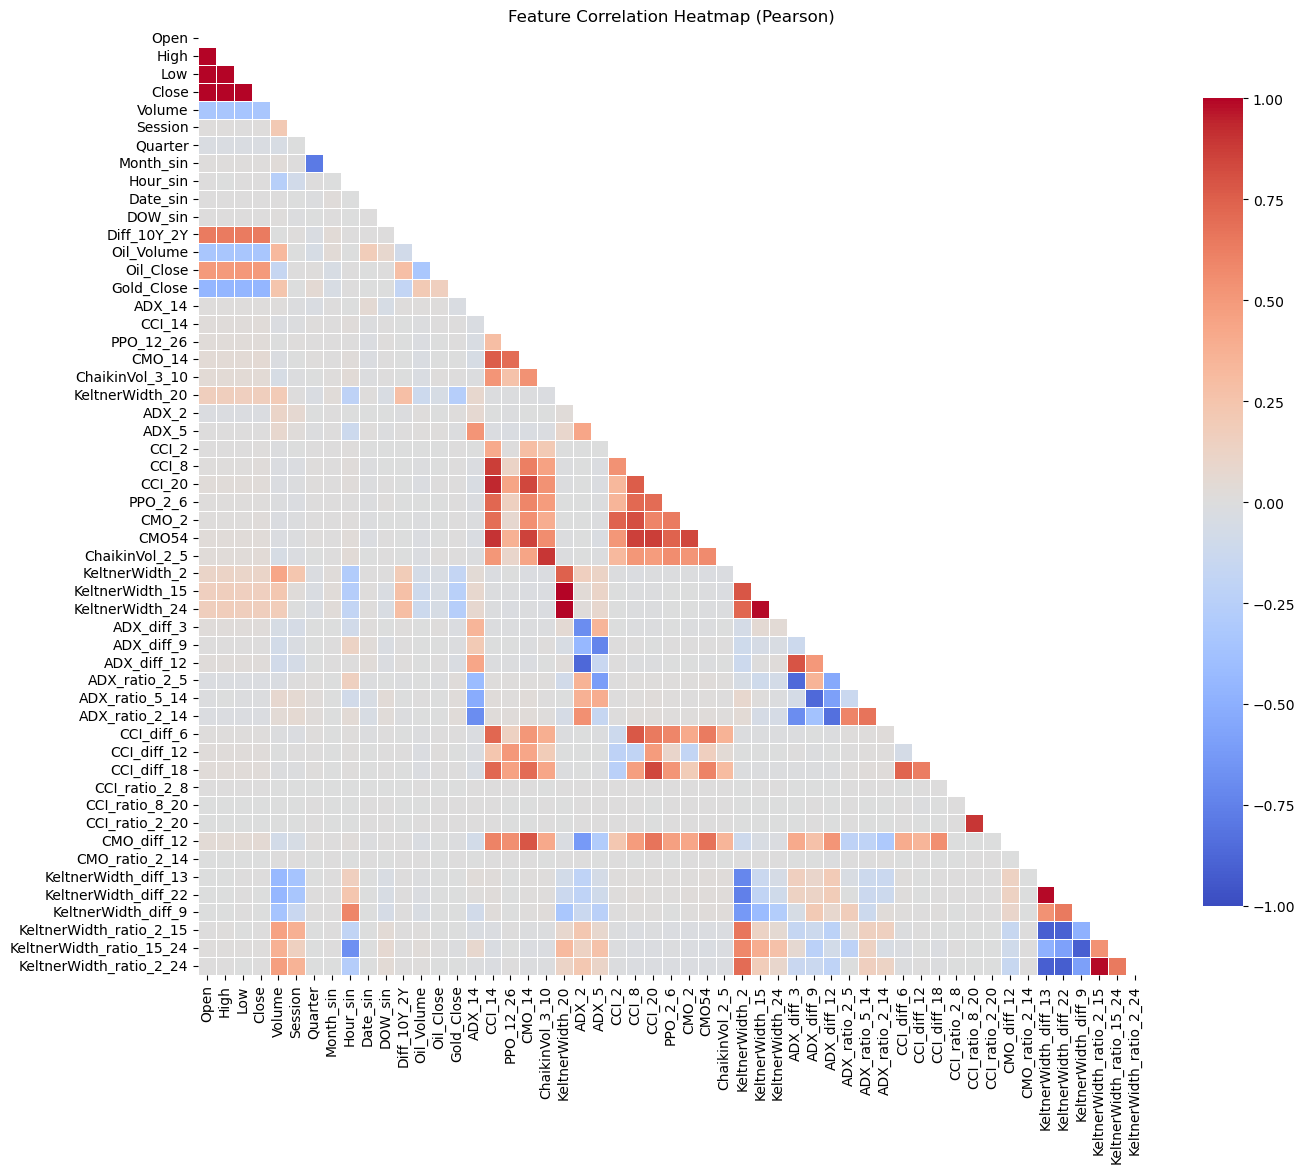

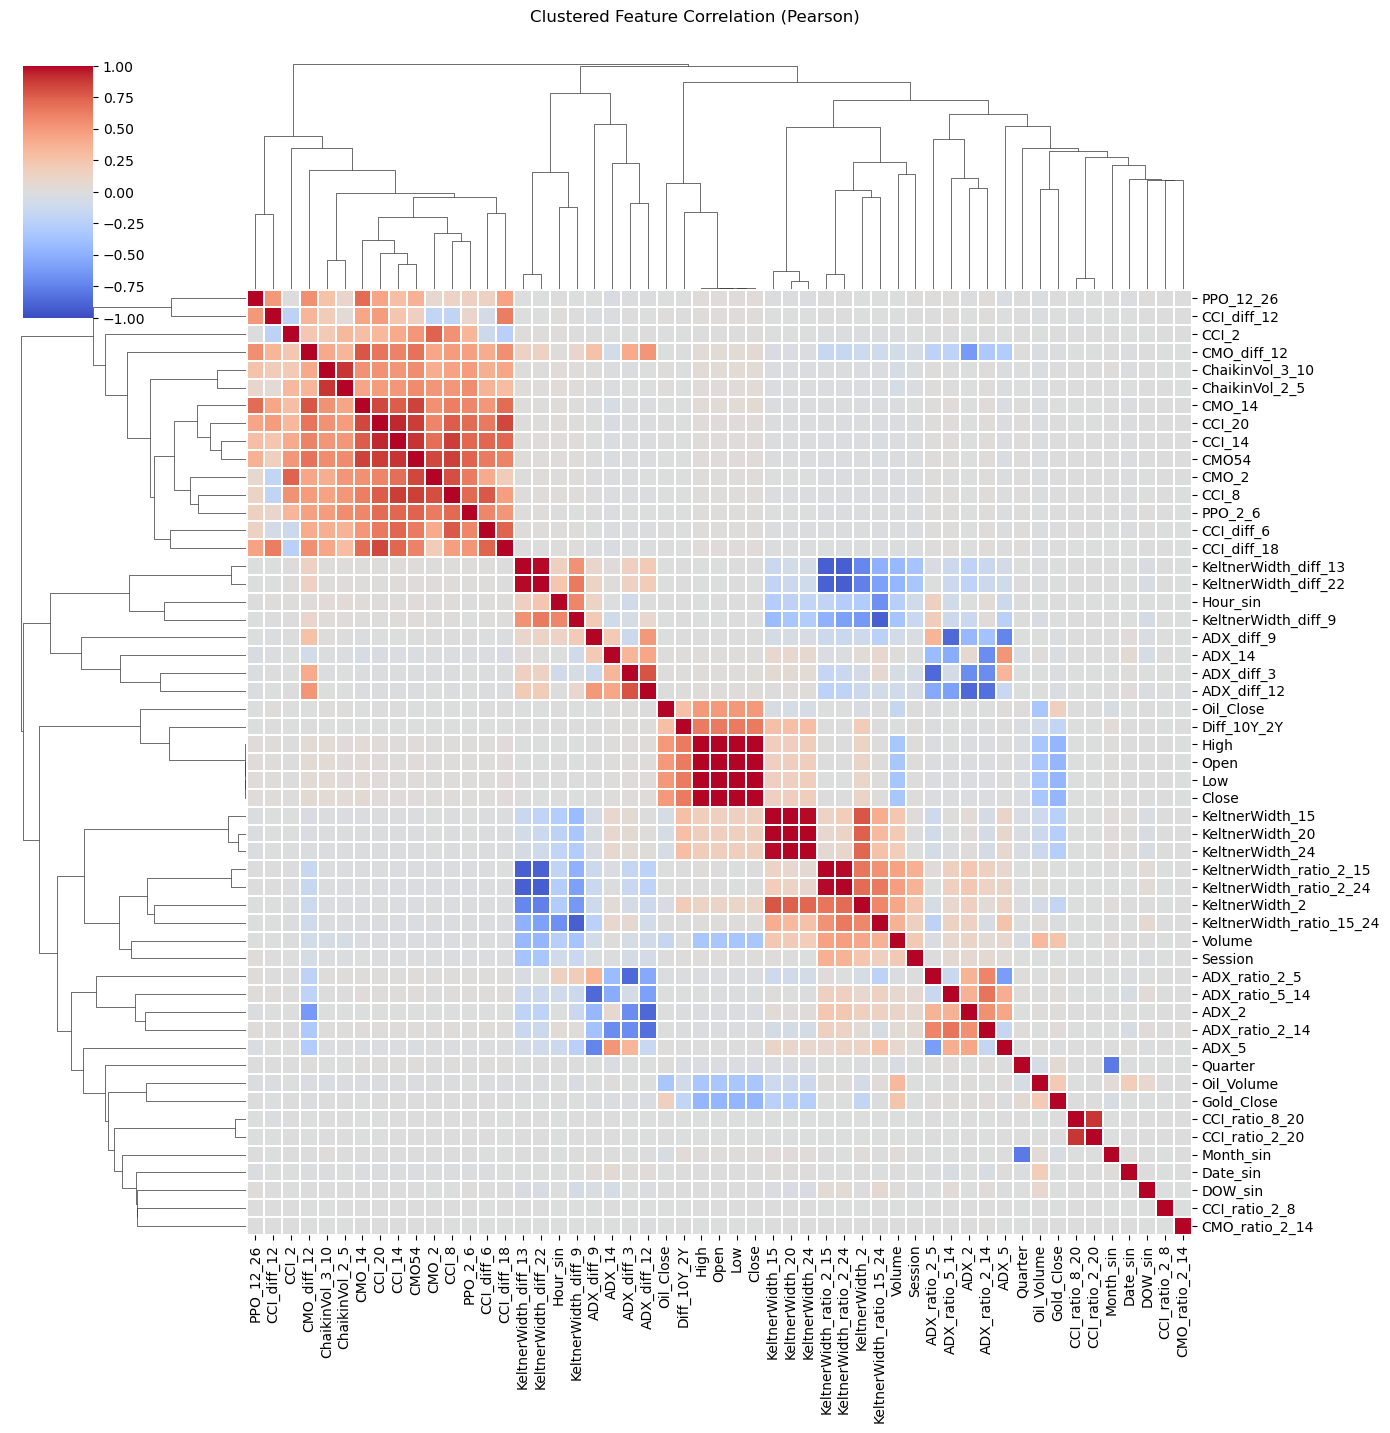

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) List of features you provided ---
features = [
    'Session', 'Quarter', 'Month_sin', 'Hour_sin', 'Date_sin', 'DOW_sin',
    'Diff_10Y_2Y', 'Oil_Volume', 'Oil_Close', 'Gold_Close',
    'ADX_14', 'CCI_14', 'PPO_12_26', 'CMO_14', 'ChaikinVol_3_10', 'KeltnerWidth_20',
    'ADX_2', 'ADX_5', 'CCI_2', 'CCI_8', 'CCI_20', 'PPO_2_6', 'CMO_2', 'CMO54',
    'ChaikinVol_2_5', 'KeltnerWidth_2', 'KeltnerWidth_15', 'KeltnerWidth_24',
    'ADX_diff_3', 'ADX_diff_9', 'ADX_diff_12', 'ADX_ratio_2_5', 'ADX_ratio_5_14', 'ADX_ratio_2_14',
    'CCI_diff_6', 'CCI_diff_12', 'CCI_diff_18', 'CCI_ratio_2_8', 'CCI_ratio_8_20', 'CCI_ratio_2_20',
    'CMO_diff_12', 'CMO_ratio_2_14',
    'KeltnerWidth_diff_13', 'KeltnerWidth_diff_22', 'KeltnerWidth_diff_9',
    'KeltnerWidth_ratio_2_15', 'KeltnerWidth_ratio_15_24', 'KeltnerWidth_ratio_2_24'
]

# --- 2) Keep only columns that exist in df ---
features = [c for c in features if c in df.columns]

# --- 3) Coerce to numeric (if any are strings) & drop non-numeric/constant cols ---
df_feat = df[features].apply(pd.to_numeric, errors='coerce')

# # Drop columns that are all NaN or constant (std == 0)
non_constant = df_feat.columns[(df_feat.nunique(dropna=True) > 1)]
df_feat = df_feat[non_constant].dropna(how='all')

# --- 4) Correlation matrix ---
corr = df.corr(method='pearson')

# --- 5) Pretty heatmap (masked upper triangle for readability) ---
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr, mask=mask, annot=False, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

# --- 6) (Optional) Clustered heatmap to group similar features ---
# Comment out if you don't want it
sns.clustermap(
    corr.fillna(0), cmap="coolwarm", vmin=-1, vmax=1,
    figsize=(14, 14), linewidths=0.3, annot=False,
    cbar_kws={"shrink": 0.8}
)
plt.suptitle("Clustered Feature Correlation (Pearson)", y=1.02)
plt.show()


# Underlying Trading Strategy Signal Generation as a Feature

* First signals will be generated then based on PnL, we will prepare the Target signal feature for the machine such that it understands the good and bad trades and gives out its own signal.
* To do this we will label the trades using PnL such that trades with return greater than 0.1% will be label as Profit and trades with return less than -0.1% will be labeld as loss and trades with return between -0.1% and 0.1% will be labeled neutral.
* So during profit label, the target signal variable will not change the signal. During loss label, the target signal variable will be reversed and during neutral label, the signal will be 0 to not do anything.

In [38]:
import numpy as np
import pandas as pd

# ---------------- Parameters (your specification) ----------------
EMA_WIN        = 500      # rolling EMA window
SMA_WIN        = 2000     # rolling SMA window

TP_PCT         = 0.005     # 1% take-profit (applies to both long & short)
SL_PCT         = 0.0      # stop-loss (0 disables SL). Set >0 if you want an SL.
MAX_HOLD_LONG  = 240      # bars to force-close long (time-based exit)
MAX_HOLD_SHORT = 240      # bars to force-close short (time-based exit)

# ---------------- Pre-req: df must exist with Open, High, Low, Close ----------------
for col in ["Open", "High", "Low", "Close"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["Open", "High", "Low", "Close"]).copy()
n = len(df)

# ---------------- Indicators (no lookahead) ----------------
# EMA aligned to current bar, SMA aligned to current bar
df["ema"] = df["Close"].ewm(span=EMA_WIN, adjust=False, min_periods=EMA_WIN).mean()
df["sma"] = df["Close"].rolling(window=SMA_WIN, min_periods=SMA_WIN).mean()

# ---------------- schedule/action arrays ----------------
# Action codes:
# 0 none, 1=open long (OL), 2=close long (CL), 3=open short (OS), 4=close short (CS)
act = np.zeros(n, dtype=np.int8)

def action_to_signal(code: int) -> int:
    """Map internal action codes to single-column signals:
       1 or 4 -> +1 (buy), 2 or 3 -> -1 (sell)
    """
    if code in (1, 4):
        return +1
    if code in (2, 3):
        return -1
    return 0

def place_action(idx: int, code: int, prefer_close=True):
    """Place action at idx or push forward to next free bar.
       If prefer_close and placing a close onto an existing open,
       swap and push the open forward (so closes override opens).
    """
    if idx >= n:
        return
    j = idx
    while j < n:
        if act[j] == 0:
            act[j] = code
            return
        if prefer_close and code in (2, 4) and act[j] in (1, 3):
            existing = act[j]
            act[j] = code
            j2 = j + 1
            while j2 < n and act[j2] != 0:
                j2 += 1
            if j2 < n:
                act[j2] = existing
            return
        j += 1
    # ran out of room -> dropped

# ---------------- convenience arrays ----------------
O = df["Open"].to_numpy()
H = df["High"].to_numpy()
L = df["Low"].to_numpy()
C = df["Close"].to_numpy()
EMA = df["ema"].to_numpy()
SMA = df["sma"].to_numpy()

# ---------------- position state ----------------
long_open = False
long_entry_idx = None
long_entry_px = None
long_close_pending = False

short_open = False
short_entry_idx = None
short_entry_px = None
short_close_pending = False

# ---------------- Walk bars ----------------
for i in range(n):
    # 0) Execute scheduled action for THIS bar
    code = int(act[i])
    if code == 1:   # open long
        long_open = True
        long_entry_idx = i
        long_entry_px = C[i]
        long_close_pending = False
    elif code == 2: # close long
        long_open = False
        long_entry_idx = None
        long_entry_px = None
        long_close_pending = False
    elif code == 3: # open short
        short_open = True
        short_entry_idx = i
        short_entry_px = C[i]
        short_close_pending = False
    elif code == 4: # close short
        short_open = False
        short_entry_idx = None
        short_entry_px = None
        short_close_pending = False

    # 1) Manage LONG exits: TP / SL (if enabled) / time-based -> schedule close NEXT bar
    if long_open and not long_close_pending and long_entry_px is not None:
        tp = long_entry_px * (1.0 + TP_PCT)
        sl = long_entry_px * (1.0 - SL_PCT) if SL_PCT > 0 else None
        hit_tp = H[i] >= tp
        hit_sl = (L[i] <= sl) if (SL_PCT > 0) else False
        timeup = (MAX_HOLD_LONG > 0) and (i - long_entry_idx >= MAX_HOLD_LONG)

        # conservative intrabar rule: if both touched, treat as SL (worse case)
        if hit_tp and hit_sl:
            hit_tp = False
            hit_sl = True

        if hit_tp or hit_sl or timeup:
            place_action(i + 1, 2, prefer_close=True)  # close long next bar
            long_close_pending = True

    # 2) Manage SHORT exits: TP / SL (if enabled) / time-based -> schedule close NEXT bar
    if short_open and not short_close_pending and short_entry_px is not None:
        tp_s = short_entry_px * (1.0 - TP_PCT)        # for short, TP is lower price
        sl_s = short_entry_px * (1.0 + SL_PCT) if SL_PCT > 0 else None
        hit_tp_s = L[i] <= tp_s
        hit_sl_s = (H[i] >= sl_s) if (SL_PCT > 0) else False
        timeup_s = (MAX_HOLD_SHORT > 0) and (i - short_entry_idx >= MAX_HOLD_SHORT)

        # conservative intrabar rule: if both touched, treat as SL (worse case)
        if hit_tp_s and hit_sl_s:
            hit_tp_s = False
            hit_sl_s = True

        if hit_tp_s or hit_sl_s or timeup_s:
            place_action(i + 1, 4, prefer_close=True)  # close short next bar
            short_close_pending = True

    # 3) Entry logic (based on indicator cross; place entry for NEXT bar)
    # Only open if flat (no long and no short currently open) and there is room
    if (not long_open) and (not short_open) and (i + 1 < n):
        # require both indicators to be not-NaN for comparison
        if not np.isnan(EMA[i]) and not np.isnan(SMA[i]):
            if EMA[i] > SMA[i]:
                place_action(i + 1, 1, prefer_close=False)  # open long next bar
            elif SMA[i] > EMA[i]:
                place_action(i + 1, 3, prefer_close=False)  # open short next bar
            # if equal -> no action

# 4) Force-close any leftover positions at the end (close on last bar)
# If a close was already scheduled beyond last bar it was dropped; so ensure we close at last bar
if long_open:
    place_action(n - 1, 2, prefer_close=True)
if short_open:
    place_action(n - 1, 4, prefer_close=True)

# 5) Build single-column signal from actions
df["signal"] = np.fromiter((action_to_signal(x) for x in act), dtype=int, count=n)




/var/folders/l_/j4rfg9014yvd4jfvv441w26r0000gn/T/ipykernel_16708/2837943448.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors="coerce")


In [41]:
import numpy as np

# Ensure the column exists
df['pnl'] = np.nan

pos = 0               # 0 = flat, +1 = long, -1 = short
entry_i = None
entry_px = None

# (optional) keep a trade id to inspect later
trade_id = np.full(len(df), np.nan, dtype=float)
tid = 0

sig = df['signal'].to_numpy()
px  = df['Close'].to_numpy()

for i in range(len(df)):
    s = sig[i]

    if pos == 0:
        if s == 1:     # open long
            pos = 1
            entry_i = i
            entry_px = px[i]
            tid += 1
        elif s == -1:  # open short
            pos = -1
            entry_i = i
            entry_px = px[i]
            tid += 1

    elif pos == 1:
        if s == -1:    # close long
            pnl = ((px[i] - entry_px) / entry_px)*100
            df.iloc[entry_i:i+1, df.columns.get_loc('pnl')] = pnl
            trade_id[entry_i:i+1] = tid
            pos = 0
            entry_i = entry_px = None

    elif pos == -1:
        if s == 1:     # close short (using your same formula)
            pnl = ((-px[i] +entry_px) / entry_px)*100
            df.iloc[entry_i:i+1, df.columns.get_loc('pnl')] = pnl
            trade_id[entry_i:i+1] = tid
            pos = 0
            entry_i = entry_px = None





In [42]:


df['pnl_label'] = np.where(df['pnl'] > 0.1, 'Profit',np.where(df['pnl'] < -0.1, 'Loss', 'Neutral'))


## Target Signal Creation based on the signal and pnl of the underlying strategy

In [43]:
import numpy as np

# target_signal rules:
# - 'Neutral'  -> 0
# - 'Loss'     -> reverse sign
# - 'Profit'   -> keep as is
df['target_signal'] = np.select(
    [
        df['pnl_label'].eq('Neutral'),
        df['pnl_label'].eq('Loss')
    ],
    [
        0,
        -df['signal']
    ],
    default=df['signal']
).astype(int)


In [44]:
df = df.drop(columns=['pnl', 'trade_id', 'pnl_label'])

In [45]:
df = df.iloc[2000:].reset_index(drop=True)


In [ ]:
# 70% train, 30% test (time-order safe, no shuffling)
split_idx = int(len(df) * 0.7)

train_df = df.iloc[:split_idx].copy()
test_df  = df.iloc[split_idx:].copy()

test_df = test_df.drop(columns=["target_signal"])

# Final Feature Selection by importance and theory using random forest

* In order to avoid any kind of look-ahead bias, I have split the df to 2 parts, one for training with 70% and the other to test with 30% and named them train_data and test_data.
* In the testing, we have further removed target_signal column also.

In [55]:
train_df.fillna(0, inplace=True)

In [56]:
# Remove rows where all columns are 0
train_df = train_df.loc[~(train_df.eq(0).all(axis=1))].copy()


In [50]:
# --- Feature importance for a trading dataset (reproducible, no lookahead) ---

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import TimeSeriesSplit

# ---------------- 0) Reproducibility ----------------
SEED = 42
np.random.seed(SEED)

# ---------------- 1) Prepare features/target ----------------
df = train_df.copy()

# Ensure target exists and is binary/ternary int-like
y = pd.to_numeric(df['target_signal'], errors='coerce').astype('Int64')

# X: all columns except the target. (You said all others are features.)
X = df.drop(columns=['target_signal']).copy()

# Keep only numeric columns (coerce any stray objects to numeric without peeking ahead)
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Replace inf with NaN, then forward-fill ONLY (uses past info => no lookahead).
# Drop remaining NaNs (typically at the very start where ffill has nothing to fill).
X = X.replace([np.inf, -np.inf], np.nan).ffill()
valid_mask = ~X.isna().any(axis=1) & y.notna()
X = X.loc[valid_mask]
y = y.loc[valid_mask].astype(int)

# ---------------- 2) Walk-forward CV with a gap ----------------
# Use TimeSeriesSplit with a small 'gap' to reduce leakage from overlapping windows.
n_splits = 5
gap_bars = 5  # adjust if your target uses future bars that can overlap

tscv = TimeSeriesSplit(n_splits=n_splits, gap=gap_bars)

# Model choice: tree-based (handles scales, interactions). Set random_state for reproducibility.
rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=3,
    class_weight="balanced_subsample",
    random_state=SEED,
    n_jobs=-1,
)

# ---------------- 3) Collect importances across folds ----------------
feat_names = X.columns.to_list()
all_model_imps = []
all_perm_imps = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), start=1):
    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_te, y_te = X.iloc[test_idx], y.iloc[test_idx]

    # Fit only on past data
    rf.fit(X_tr, y_tr)

    # Built-in (in-sample) model importances
    all_model_imps.append(pd.Series(rf.feature_importances_, index=feat_names))

    # Out-of-sample permutation importances on the validation fold
    perm = permutation_importance(
        rf, X_te, y_te,
        n_repeats=10,
        random_state=SEED,
        n_jobs=-1,
        scoring=None  # default = estimator's score (accuracy). Change if you prefer f1, roc_auc, etc.
    )
    all_perm_imps.append(pd.Series(perm.importances_mean, index=feat_names))

# ---------------- 4) Aggregate & present ----------------
model_imp_df = pd.concat(all_model_imps, axis=1)
perm_imp_df  = pd.concat(all_perm_imps,  axis=1)

model_imp_mean = model_imp_df.mean(axis=1).rename("model_importance_mean")
model_imp_std  = model_imp_df.std(axis=1).rename("model_importance_std")

perm_imp_mean  = perm_imp_df.mean(axis=1).rename("perm_importance_mean")
perm_imp_std   = perm_imp_df.std(axis=1).rename("perm_importance_std")

importance = pd.concat([model_imp_mean, model_imp_std, perm_imp_mean, perm_imp_std], axis=1)
importance = importance.sort_values("perm_importance_mean", ascending=False)

# Show top features (permutation-based is the most trustworthy OOS signal)
top_k = 25
print("\nTop features by OUT-OF-SAMPLE permutation importance (mean across folds):\n")
display(importance.head(top_k))

# If you also want the full table:
importance.to_csv("feature_importance_timeseries.csv")



Top features by OUT-OF-SAMPLE permutation importance (mean across folds):



,model_importance_mean,model_importance_std,perm_importance_mean,perm_importance_std
signal,0.306649,0.042522,0.011702,0.002480
CMO_14,0.028196,0.000615,0.001137,0.000429
ADX_5,0.028298,0.001057,0.000819,0.000296
PPO_2_6,0.027918,0.000813,0.000595,0.000526
CCI_ratio_2_20,0.016868,0.002119,0.000582,0.000256
CCI_20,0.022840,0.001432,0.000391,0.000319
KeltnerWidth_ratio_15_24,0.020487,0.000306,0.000365,0.000174
CMO_ratio_2_14,0.015399,0.002409,0.000341,0.000282
CCI_ratio_8_20,0.015631,0.001033,0.000318,0.000115
CCI_diff_12,0.012387,0.001230,0.000307,0.000082


In [51]:
# Or descending (largest → smallest)
df_sorted_desc = importance.sort_values(by="model_importance_mean", ascending=False)

df_sorted_desc

,model_importance_mean,model_importance_std,perm_importance_mean,perm_importance_std
signal,0.306649,0.042522,1.170155e-02,0.002480
ADX_5,0.028298,0.001057,8.187225e-04,0.000296
CMO_14,0.028196,0.000615,1.136943e-03,0.000429
PPO_2_6,0.027918,0.000813,5.947324e-04,0.000526
CCI_20,0.022840,0.001432,3.908241e-04,0.000319
KeltnerWidth_diff_9,0.021018,0.001042,2.765119e-04,0.000094
KeltnerWidth_ratio_15_24,0.020487,0.000306,3.645632e-04,0.000174
CCI_14,0.020120,0.002310,1.884606e-04,0.000213
CCI_8,0.019527,0.000839,1.930949e-04,0.000339
CCI_ratio_2_20,0.016868,0.002119,5.823743e-04,0.000256


In [52]:
# Or descending (largest → smallest)
df_sorted_desc = importance.sort_values(by="perm_importance_mean", ascending=False)


df_sorted_desc

,model_importance_mean,model_importance_std,perm_importance_mean,perm_importance_std
signal,0.306649,0.042522,1.170155e-02,0.002480
CMO_14,0.028196,0.000615,1.136943e-03,0.000429
ADX_5,0.028298,0.001057,8.187225e-04,0.000296
PPO_2_6,0.027918,0.000813,5.947324e-04,0.000526
CCI_ratio_2_20,0.016868,0.002119,5.823743e-04,0.000256
CCI_20,0.022840,0.001432,3.908241e-04,0.000319
KeltnerWidth_ratio_15_24,0.020487,0.000306,3.645632e-04,0.000174
CMO_ratio_2_14,0.015399,0.002409,3.413918e-04,0.000282
CCI_ratio_8_20,0.015631,0.001033,3.182204e-04,0.000115
CCI_diff_12,0.012387,0.001230,3.074071e-04,0.000082


In [64]:
train_df["CCI_ratio_8_20"] = pd.to_numeric(train_df["CCI_ratio_8_20"].replace("#NAME?", 0), errors="coerce")
train_df


,Hour_sin,DOW_sin,ADX_14,CCI_14,PPO_12_26,CMO_14,ADX_2,ADX_5,CCI_8,CCI_20,...,CCI_diff_18,CCI_ratio_8_20,CCI_ratio_2_20,CMO_diff_12,CMO_ratio_2_14,KeltnerWidth_diff_9,KeltnerWidth_ratio_15_24,KeltnerWidth_ratio_2_24,signal,target_signal
0,0.86603,0.974928,25.930420,39.315068,0.121403,7.355190,41.651610,42.154713,-6.549708,59.300273,...,125.966939,-0.110450,-1.124222,-34.296419,-1.695703,0.000011,0.993302,1.370979,-1.0,-1.0
1,0.96593,0.974928,25.909992,-65.160075,0.107986,8.428157,31.880359,37.044387,-132.473118,23.189994,...,89.856660,-5.712512,-2.874803,-23.452201,1.023121,0.000036,0.977000,0.906158,0.0,0.0
2,1.00000,0.974928,25.381184,-146.502058,0.095970,3.275771,48.925969,30.959935,-167.017544,-12.596221,...,54.070446,13.259337,5.292593,-45.650197,0.455056,0.000055,0.963263,0.758581,0.0,0.0
3,0.96593,0.974928,25.225738,-88.888889,0.085549,7.984586,35.433883,27.694438,-79.830149,-3.902146,...,-70.568813,20.458011,-17.084615,-27.449297,-0.750000,0.000060,0.959495,0.815246,0.0,0.0
4,0.86603,0.974928,26.060597,86.264929,0.084842,24.751330,59.426680,33.035738,67.208672,96.026205,...,29.359538,0.699899,0.694255,-34.675350,0.772813,0.000025,0.983683,1.174859,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77682,-1.00000,0.433884,33.262839,-172.486839,-0.129321,-67.588764,97.465878,70.027283,-111.789483,-233.479963,...,-166.813296,0.478797,0.285535,-165.054643,0.386503,-0.000233,1.176570,1.682584,0.0,0.0
77683,-0.96593,0.433884,36.313543,-125.872774,-0.160356,-51.571693,98.306065,74.257578,-82.237004,-172.632282,...,-239.298949,0.476371,-0.386177,-149.877758,-0.529635,-0.000231,1.169284,1.484021,0.0,0.0
77684,-0.86603,0.433884,39.146339,-103.217265,-0.188601,-54.267195,98.726158,77.641815,-68.714640,-140.468984,...,-73.802317,0.489180,0.474601,-152.993353,0.645887,-0.000180,1.135452,0.940292,0.0,0.0
77685,-0.70711,0.433884,42.314998,-125.764047,-0.234321,-65.243593,99.321072,81.298451,-123.954156,-160.044002,...,-93.377336,0.774500,0.416552,-164.564665,0.530093,-0.000271,1.177650,1.960267,0.0,0.0


In [57]:
cols_to_drop = ["Quarter", "Month_sin", "Date_sin", "Close", "ema", "Open", "Oil_Close", "CCI_2",
                "KeltnerWidth_diff_22","KeltnerWidth_ratio_2_15", "ADX_diff_12", "ADX_diff_3","ADX_diff_9",
                "CMO_2", "KeltnerWidth_diff_13", "ADX_ratio_2_14", "ADX_ratio_5_14", "ChaikinVol_2_5", "CCI_ratio_2_8",
                "Volume", "CMO_2", "KeltnerWidth_15", "KeltnerWidth_20", "KeltnerWidth_24",
                "ChaikinVol_3_10", "Unnamed: 0", "High", "Low", "sma", "Session", "Gold_Close", "Oil_Volume", "Diff_10Y_2Y"]
train_df = train_df.drop(columns=cols_to_drop)


# Model Training and Optimisation

In [65]:
# === Robust, reproducible no-lookahead XGBoost (xgb.train) with tuning ===

import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

# ---------------- Config ----------------
SEED = 42
np.random.seed(SEED)

N_ITER = 30       # hyperparam search iterations
N_SPLITS = 5      # TimeSeries CV splits
GAP_BARS = 5      # purge gap between train/valid
NUM_BOOST_ROUND = 3000
EARLY_STOP_ROUNDS = 150

# ---------------- 1) Load ----------------
df = train_df.copy()

# Target
y = pd.to_numeric(df["target_signal"], errors="coerce")
valid_idx = y.notna()
df = df.loc[valid_idx].copy()
y = y.loc[valid_idx]

# Features
X = df.drop(columns=["target_signal"]).copy()

# Replace ±inf with 0 (no NaNs)
X = X.replace([np.inf, -np.inf], 0)

# Ensure numeric array
X_np = X.to_numpy(dtype=float, copy=False)

# Label encoding (supports {-1,0,1} or binary)
valid_labels = sorted(y.unique())
label_to_idx = {lab: i for i, lab in enumerate(valid_labels)}
idx_to_label = {i: lab for lab, i in label_to_idx.items()}
y_enc = pd.Series(y.map(label_to_idx).astype(int)).reset_index(drop=True)

num_classes = len(valid_labels)
is_multiclass = num_classes > 2

# ---------------- 2) XGBoost params ----------------
OBJECTIVE = "multi:softprob" if is_multiclass else "binary:logistic"
EVAL_METRIC = "mlogloss" if is_multiclass else "logloss"

BASE_PARAMS = {
    "objective": OBJECTIVE,
    "eval_metric": EVAL_METRIC,
    "eta": 0.03,
    "max_depth": 6,          # <- INT
    "min_child_weight": 1.0,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "alpha": 0.0,
    "gamma": 0.0,
    "tree_method": "hist",
    "seed": SEED,
    "verbosity": 0,
}
if is_multiclass:
    BASE_PARAMS["num_class"] = num_classes

# ---------------- 3) Search space ----------------
# Keep integer params as Python ints to start with
SEARCH_SPACE = {
    "eta":               np.array([0.01, 0.015, 0.02, 0.03, 0.05, 0.07], dtype=float),
    "max_depth":         np.array([4, 5, 6, 7, 8], dtype=int),          # <- ints
    "min_child_weight":  np.array([1.0, 2.0, 3.0, 5.0], dtype=float),
    "subsample":         np.array([0.6, 0.7, 0.8, 0.9, 1.0], dtype=float),
    "colsample_bytree":  np.array([0.6, 0.7, 0.8, 0.9, 1.0], dtype=float),
    "lambda":            np.array([0.5, 1.0, 2.0, 3.0, 5.0], dtype=float),
    "alpha":             np.array([0.0, 0.1, 0.3, 0.5], dtype=float),
    "gamma":             np.array([0.0, 0.1, 0.3, 0.5], dtype=float),
}

# ---------------- 4) Helpers ----------------
def compute_sample_weights(y_arr: np.ndarray) -> np.ndarray:
    classes = np.unique(y_arr)
    cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_arr)
    mp = {cls: w for cls, w in zip(classes, cw)}
    return np.vectorize(mp.get)(y_arr).astype(float)

def sample_params(rng: np.random.Generator):
    return {k: rng.choice(v) for k, v in SEARCH_SPACE.items()}

def cast_params_for_xgb(params: dict) -> dict:
    """Ensure correct Python types for xgboost."""
    out = {}
    for k, v in params.items():
        if isinstance(v, np.generic):      # numpy scalar -> Python scalar
            v = v.item()
        if k in {"max_depth"}:
            v = int(v)                     # must be int
        else:
            v = float(v) if isinstance(v, (int, float)) else v
        out[k] = v
    return out

def _best_ntree_limit(booster):
    if getattr(booster, "best_ntree_limit", 0):
        return int(booster.best_ntree_limit)
    if getattr(booster, "best_iteration", None) is not None:
        return int(booster.best_iteration) + 1
    return int(NUM_BOOST_ROUND)

def _predict_labels(booster, dmat, is_multiclass):
    ntree = _best_ntree_limit(booster)
    try:
        pred = booster.predict(dmat, ntree_limit=ntree)
    except TypeError:
        try:
            pred = booster.predict(dmat, iteration_range=(0, ntree))
        except TypeError:
            pred = booster.predict(dmat)
    pred = np.asarray(pred)
    if is_multiclass:
        return pred.argmax(axis=1)
    return (pred >= 0.5).astype(int)

# ---------------- 5) CV evaluation ----------------
tscv = TimeSeriesSplit(n_splits=N_SPLITS, gap=GAP_BARS)

def evaluate_params(params: dict, X_np: np.ndarray, y_enc_series: pd.Series):
    # cast types robustly for this trial
    trial_params = cast_params_for_xgb(params)
    fold_metrics, best_iters = [], []
    for fold, (tr_idx, te_idx) in enumerate(tscv.split(X_np), start=1):
        X_tr, X_te = X_np[tr_idx], X_np[te_idx]
        y_tr = y_enc_series.iloc[tr_idx].to_numpy()
        y_te = y_enc_series.iloc[te_idx].to_numpy()

        w_tr = compute_sample_weights(y_tr)

        dtrain = xgb.DMatrix(X_tr, label=y_tr, weight=w_tr)
        dvalid = xgb.DMatrix(X_te,  label=y_te)

        bst = xgb.train(
            params={**BASE_PARAMS, **trial_params},
            dtrain=dtrain,
            num_boost_round=NUM_BOOST_ROUND,
            evals=[(dtrain, "train"), (dvalid, "valid")],
            early_stopping_rounds=EARLY_STOP_ROUNDS,
            verbose_eval=False
        )

        best_iters.append(_best_ntree_limit(bst))

        y_pred_enc = _predict_labels(bst, dvalid, is_multiclass)
        y_true_lbl = np.vectorize(idx_to_label.get)(y_te)
        y_pred_lbl = np.vectorize(idx_to_label.get)(y_pred_enc)

        fold_metrics.append({
            "accuracy": accuracy_score(y_true_lbl, y_pred_lbl),
            "balanced_accuracy": balanced_accuracy_score(y_true_lbl, y_pred_lbl),
            "f1_macro": f1_score(y_true_lbl, y_pred_lbl, average="macro", zero_division=0),
        })

    mean_metrics = {k: float(np.mean([m[k] for m in fold_metrics])) for k in fold_metrics[0].keys()}
    mean_best_iters = int(np.round(np.mean(best_iters)))
    return mean_metrics, mean_best_iters

# ---------------- 6) Randomized search ----------------
rng = np.random.default_rng(SEED)
results = []

print("\n=== Hyperparameter Tuning (Randomized Search) ===")
for i in range(1, N_ITER + 1):
    params = sample_params(rng)
    mean_metrics, mean_best_iters = evaluate_params(params, X_np, y_enc)
    entry = {"iter": i, **params, "mean_best_iters": mean_best_iters, **mean_metrics}
    results.append(entry)
    print(f"[{i:02d}/{N_ITER}] BA={entry['balanced_accuracy']:.4f} | F1m={entry['f1_macro']:.4f} | "
          f"Acc={entry['accuracy']:.4f} | best_n_estimators≈{mean_best_iters}")

results_df = pd.DataFrame(results).sort_values(
    by=["balanced_accuracy", "f1_macro", "accuracy"], ascending=False
).reset_index(drop=True)

best = results_df.iloc[0].to_dict()
best_params_raw = {k: best[k] for k in SEARCH_SPACE.keys()}
best_params = cast_params_for_xgb(best_params_raw)   # <-- enforce correct types here
best_n_estimators = int(best["mean_best_iters"])

print("\n=== Best Params (by balanced_accuracy) ===")
print(best_params)
print(f"Best mean_best_iters: {best_n_estimators}")
print("\nTop-5 tuning results:")
print(results_df.head(5))





=== Hyperparameter Tuning (Randomized Search) ===
[01/30] BA=0.8559 | F1m=0.8482 | Acc=0.9946 | best_n_estimators≈1001
[02/30] BA=0.8510 | F1m=0.8434 | Acc=0.9944 | best_n_estimators≈844
[03/30] BA=0.8579 | F1m=0.8503 | Acc=0.9946 | best_n_estimators≈470
[04/30] BA=0.8478 | F1m=0.8403 | Acc=0.9943 | best_n_estimators≈181
[05/30] BA=0.8528 | F1m=0.8451 | Acc=0.9945 | best_n_estimators≈1021
[06/30] BA=0.8542 | F1m=0.8466 | Acc=0.9945 | best_n_estimators≈1374
[07/30] BA=0.8589 | F1m=0.8512 | Acc=0.9947 | best_n_estimators≈253
[08/30] BA=0.8544 | F1m=0.8466 | Acc=0.9945 | best_n_estimators≈371
[09/30] BA=0.8551 | F1m=0.8475 | Acc=0.9945 | best_n_estimators≈800
[10/30] BA=0.8564 | F1m=0.8487 | Acc=0.9946 | best_n_estimators≈821
[11/30] BA=0.8498 | F1m=0.8422 | Acc=0.9944 | best_n_estimators≈133
[12/30] BA=0.8421 | F1m=0.8346 | Acc=0.9941 | best_n_estimators≈144
[13/30] BA=0.8523 | F1m=0.8445 | Acc=0.9945 | best_n_estimators≈612
[14/30] BA=0.8519 | F1m=0.8442 | Acc=0.9945 | best_n_estimator

In [66]:
def _num_boosted_rounds(booster) -> int:
    """How many trees the model actually has."""
    try:
        return int(booster.num_boosted_rounds())
    except AttributeError:
        # Fallback for very old versions
        try:
            return int(getattr(booster, "best_iteration")) + 1
        except Exception:
            return int(NUM_BOOST_ROUND)

def _best_iteration_limit(booster) -> int:
    """
    Best usable iteration count for prediction:
    prefer early-stopped best_iteration+1 if available,
    otherwise the model's actual number of rounds.
    """
    bi = getattr(booster, "best_iteration", None)
    if bi is not None:
        return int(bi) + 1
    return _num_boosted_rounds(booster)

def _predict_labels(booster, dmat, is_multiclass):
    """
    Works for XGBoost >= 2.0 (no ntree_limit). Uses iteration_range
    and clamps to the model's true number of trees to avoid OOR errors.
    """
    # What we'd *like* to use
    limit = _best_iteration_limit(booster)
    # What the model *has*
    total = _num_boosted_rounds(booster)
    # Clamp
    end = min(limit, total)

    # Predict
    try:
        pred = booster.predict(dmat, iteration_range=(0, end))
    except TypeError:
        # Very old versions: no iteration_range
        pred = booster.predict(dmat)

    pred = np.asarray(pred)
    if is_multiclass:
        return pred.argmax(axis=1)
    return (pred >= 0.5).astype(int)


In [80]:
# === Final XGBoost training with your tuned params (no lookahead) ===

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

# ---------------- Config ----------------
SEED = 42
BEST_PARAMS = {
    "eta": 0.03,
    "max_depth": 4,            # must be int
    "min_child_weight": 2.0,
    "subsample": 0.8,
    "colsample_bytree": 1.0,
    "lambda": 1.0,
    "alpha": 0.1,
    "gamma": 0.1,
}
BEST_N_ESTIMATORS = 360       # from your tuning

# ---------------- 1) Prepare data ----------------
df = train_df.copy()

# Target (assumed cleaned): -1/0/1 (or binary)
y = pd.to_numeric(df["target_signal"], errors="coerce")
keep = y.notna()
df = df.loc[keep].copy()
y = y.loc[keep]

# Features
X = df.drop(columns=["target_signal"]).copy()

# Safety: replace ±inf with 0 (no NaNs)
X = X.replace([np.inf, -np.inf], 0)

# To numpy
X_np = X.to_numpy(dtype=float, copy=False)

# Encode labels
labels_sorted = sorted(y.unique())
lab2idx = {lab: i for i, lab in enumerate(labels_sorted)}
idx2lab = {i: lab for lab, i in lab2idx.items()}
y_enc = y.map(lab2idx).astype(int).to_numpy()

num_classes = len(labels_sorted)
is_multiclass = num_classes > 2

# ---------------- 2) XGBoost params ----------------
params = {
    "objective": "multi:softprob" if is_multiclass else "binary:logistic",
    "eval_metric": "mlogloss" if is_multiclass else "logloss",
    "tree_method": "hist",
    "seed": SEED,
    "verbosity": 0,
    **BEST_PARAMS,
}
if is_multiclass:
    params["num_class"] = num_classes

# ---------------- 3) Class-balanced weights ----------------
classes = np.unique(y_enc)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_enc)
weight_map = {cls: w for cls, w in zip(classes, cw)}
w_full = np.vectorize(weight_map.get)(y_enc).astype(float)

# ---------------- 4) Train final model ----------------
dtrain_full = xgb.DMatrix(X_np, label=y_enc, weight=w_full)
bst_final = xgb.train(
    params=params,
    dtrain=dtrain_full,
    num_boost_round=BEST_N_ESTIMATORS,   # use tuned trees
    evals=[(dtrain_full, "train")],
    verbose_eval=False
)

bst_final.save_model("xgb_trading_model_tuned.json")




Final model saved -> xgb_trading_model_tuned.json

In-sample classification report (sanity only; use CV for OOS):
              precision    recall  f1-score   support

        -1.0       0.93      0.94      0.94       852
         0.0       1.00      1.00      1.00     75983
         1.0       0.91      0.96      0.94       852

    accuracy                           1.00     77687
   macro avg       0.95      0.97      0.96     77687
weighted avg       1.00      1.00      1.00     77687



# Predictions for Trading

In [194]:
test_df.fillna(0, inplace=True)

In [195]:
# Remove rows where all columns are 0
test_df = test_df.loc[~(train_df.eq(0).all(axis=1))].copy()


In [196]:
cols_to_drop = ["Quarter", "Month_sin", "Date_sin",  "ema",  "Oil_Close", "CCI_2",
                "KeltnerWidth_diff_22","KeltnerWidth_ratio_2_15", "ADX_diff_12", "ADX_diff_3","ADX_diff_9",
                "CMO_2", "KeltnerWidth_diff_13", "ADX_ratio_2_14", "ADX_ratio_5_14", "ChaikinVol_2_5", "CCI_ratio_2_8",
                 "CMO_2", "KeltnerWidth_15", "KeltnerWidth_20", "KeltnerWidth_24",
                "ChaikinVol_3_10", "Unnamed: 0", "sma", "Session", "Gold_Close", "Oil_Volume", "Diff_10Y_2Y"]
test_df = test_df.drop(columns=cols_to_drop)


In [197]:

# Replace the bad value in CCI_8_20 with 0 and ensure numeric dtype
test_df["CCI_ratio_8_20"] = pd.to_numeric(test_df["CCI_ratio_8_20"].replace("#NAME?", 0), errors="coerce")
test_df


,Open,High,Low,Close,Volume,Hour_sin,DOW_sin,DateTime,ADX_14,CCI_14,...,CCI_diff_18,CCI_ratio_8_20,CCI_ratio_2_20,CMO_diff_12,CMO_ratio_2_14,KeltnerWidth_diff_9,KeltnerWidth_ratio_15_24,KeltnerWidth_ratio_2_24,signal,target_signal
0,1.11810,1.11944,1.11797,1.11923,963,-0.25882,0.433884,07/03/19 23:00,47.175526,-94.082772,...,-185.557987,0.716473,-0.560736,-112.484341,-0.708596,-0.000172,1.118244,0.950727,-1,1
1,1.11916,1.11985,1.11916,1.11976,764,0.25882,-0.433884,08/03/19 1:00,48.511681,-75.385246,...,-161.694000,0.444908,-0.701553,-84.682762,-0.884346,-0.000113,1.081275,0.627573,0,0
2,1.11976,1.11977,1.11855,1.11907,1620,0.50000,-0.433884,08/03/19 2:00,49.885998,-75.857692,...,-24.224772,0.522943,0.733476,-87.926650,0.878839,-0.000085,1.062512,0.744744,0,0
3,1.11906,1.11944,1.11848,1.11881,1091,0.70711,-0.433884,08/03/19 3:00,51.177650,-74.037359,...,-18.661185,0.579275,0.781300,-92.209732,0.900446,-0.000052,1.039139,0.687263,0,0
4,1.11881,1.12003,1.11860,1.11979,992,0.86603,-0.433884,08/03/19 4:00,51.686381,-55.926237,...,-137.969772,-0.063312,-0.934976,-82.338745,-1.192046,-0.000043,1.032691,0.873788,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,1.03502,1.03548,1.03438,1.03490,2323,-0.96593,0.781831,31/12/24 19:00,23.611404,-160.337614,...,-150.663910,0.499089,0.306752,-146.708669,0.415789,-0.000087,1.060976,0.938986,0,0
33325,1.03489,1.03566,1.03455,1.03529,1900,-0.86603,0.781831,31/12/24 20:00,25.551370,-119.355906,...,-228.152865,0.474172,-0.412832,-120.580881,-0.558554,-0.000060,1.042922,0.828449,0,0
33326,1.03526,1.03645,1.03516,1.03547,1445,-0.70711,0.781831,31/12/24 21:00,26.385304,-85.267741,...,-185.465493,0.389379,-0.561173,-101.534169,-0.781851,-0.000046,1.032793,0.875523,0,0
33327,1.03547,1.03631,1.03544,1.03582,1208,-0.50000,0.781831,31/12/24 22:00,27.159672,-69.016843,...,-164.506501,0.274403,-0.681386,-87.924347,-0.965948,-0.000015,1.011219,0.716892,0,0


In [198]:
test_df.to_csv('test_with_dates.csv')
test_df = test_df.drop(columns= ['DateTime', 'target_signal', "Close","Open","Volume","High", "Low", ])

In [199]:
# Drop any unnamed index columns
test_df = test_df.loc[:, ~test_df.columns.str.contains("^Unnamed")]
test_df

,Hour_sin,DOW_sin,ADX_14,CCI_14,PPO_12_26,CMO_14,ADX_2,ADX_5,CCI_8,CCI_20,...,CCI_diff_12,CCI_diff_18,CCI_ratio_8_20,CCI_ratio_2_20,CMO_diff_12,CMO_ratio_2_14,KeltnerWidth_diff_9,KeltnerWidth_ratio_15_24,KeltnerWidth_ratio_2_24,signal
0,-0.25882,0.433884,47.175526,-94.082772,-0.334313,-52.333017,60.151324,81.362946,-85.182427,-118.891320,...,-33.708893,-185.557987,0.716473,-0.560736,-112.484341,-0.708596,-0.000172,1.118244,0.950727,-1
1,0.25882,-0.433884,48.511681,-75.385246,-0.384653,-46.360881,38.321881,76.177460,-42.278460,-95.027334,...,-52.748874,-161.694000,0.444908,-0.701553,-84.682762,-0.884346,-0.000113,1.081275,0.627573,0
2,0.50000,-0.433884,49.885998,-75.857692,-0.430903,-49.155591,38.771059,73.248674,-47.531006,-90.891438,...,-43.360433,-24.224772,0.522943,0.733476,-87.926650,0.878839,-0.000085,1.062512,0.744744,0
3,0.70711,-0.433884,51.177650,-74.037359,-0.465194,-50.208330,42.001402,71.053743,-49.428255,-85.327852,...,-35.899597,-18.661185,0.579275,0.781300,-92.209732,0.900446,-0.000052,1.039139,0.687263,0
4,0.86603,-0.433884,51.686381,-55.926237,-0.472084,-38.562741,43.776003,63.825371,4.514309,-71.303106,...,-75.817414,-137.969772,-0.063312,-0.934976,-82.338745,-1.192046,-0.000043,1.032691,0.873788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,-0.96593,0.781831,23.611404,-160.337614,-0.051720,-49.033438,97.675231,61.594852,-108.467310,-217.330577,...,-108.863267,-150.663910,0.499089,0.306752,-146.708669,0.415789,-0.000087,1.060976,0.938986,0
33325,-0.86603,0.781831,25.551370,-119.355906,-0.082496,-43.107288,77.473593,64.304066,-76.572200,-161.486199,...,-84.913999,-228.152865,0.474172,-0.412832,-120.580881,-0.558554,-0.000060,1.042922,0.828449,0
33326,-0.70711,0.781831,26.385304,-85.267741,-0.116771,-40.333690,61.200479,58.403529,-46.257822,-118.798827,...,-72.541004,-185.465493,0.389379,-0.561173,-101.534169,-0.781851,-0.000046,1.032793,0.875523,0
33327,-0.50000,0.781831,27.159672,-69.016843,-0.151568,-34.860425,53.063921,53.683099,-26.847505,-97.839834,...,-70.992329,-164.506501,0.274403,-0.681386,-87.924347,-0.965948,-0.000015,1.011219,0.716892,0


In [187]:
import numpy as np
import pandas as pd
import xgboost as xgb

# ---- Load model (if not in memory) ----
try:
    bst_final  # noqa: F821
except NameError:
    bst_final = xgb.Booster()
    bst_final.load_model("xgb_trading_model_tuned.json")

# Helper: how many features the model expects
try:
    model_nfeat = bst_final.num_features()
except Exception:
    # Older xgboost: num_features might be an attribute
    model_nfeat = getattr(bst_final, "num_features", None)

# ---- Build the EXACT feature order used at training ----
# Best practice: if you saved it earlier, load it here
# feature_order = list(np.load("xgb_feature_order.npy", allow_pickle=True))

# If you don't have it saved, reconstruct from train_df, dropping obvious non-features:
non_feature_cols = {"target_signal", "predicted_signal", "DateTime"}
train_features_now = [c for c in train_df.columns if c not in non_feature_cols]
feature_order = train_features_now  # fallback

# Optional: assert against model's expected count if we know it
if model_nfeat is not None and len(feature_order) != model_nfeat:
    # If off-by-one, try dropping any "Unnamed" or accidental columns
    feature_order = [c for c in feature_order if not str(c).startswith("Unnamed")]
    if len(feature_order) != model_nfeat:
        print(f"[Warn] Training feature count {len(feature_order)} != model expects {model_nfeat}.")
        # We'll still proceed but also print a diff vs. test below.

# ---- Prepare test features strictly in training order ----
df_te = test_df.copy()

# Drop obvious non-features from test too (in case they exist)
df_te = df_te.drop(columns=[c for c in df_te.columns if c in non_feature_cols or str(c).startswith("Unnamed")], errors="ignore")

# Reindex to the training feature order; fill missing with 0 (your policy)
X_te = df_te.reindex(columns=feature_order, fill_value=0)

# Debug: check shape vs model
if model_nfeat is not None and X_te.shape[1] != model_nfeat:
    extra_in_test = set(X_te.columns) - set(feature_order)
    missing_in_test = set(feature_order) - set(X_te.columns)
    print("[Mismatch] Model expects:", model_nfeat, "| X_te has:", X_te.shape[1])
    print("Extra in test (should be none):", extra_in_test)
    print("Missing in test:", missing_in_test)
    # As a last guard, if X_te has MORE cols than model, trim to first model_nfeat cols in the training order:
    if X_te.shape[1] > model_nfeat:
        X_te = X_te[feature_order[:model_nfeat]]
    elif X_te.shape[1] < model_nfeat:
        # Add missing columns as 0, maintaining order
        for c in feature_order:
            if c not in X_te.columns and len(X_te.columns) < model_nfeat:
                X_te[c] = 0.0
        X_te = X_te[feature_order[:model_nfeat]]

# Final consistency checks
assert model_nfeat is None or X_te.shape[1] == model_nfeat, \
    f"Still mismatched: model expects {model_nfeat}, X_te has {X_te.shape[1]}"

# Clean infinities like training
X_te = X_te.replace([np.inf, -np.inf], 0).astype(float)

# ---- Predict ----
dtest = xgb.DMatrix(X_te.to_numpy(dtype=float, copy=False))
pred = bst_final.predict(dtest)

# Map back to labels using training mapping
labels_sorted = sorted(pd.to_numeric(train_df["target_signal"], errors="coerce").dropna().unique())
lab2idx = {lab: i for i, lab in enumerate(labels_sorted)}
idx2lab = {i: lab for lab, i in lab2idx.items()}

if pred.ndim == 2:   # multiclass
    y_pred_enc = pred.argmax(axis=1)
else:                # binary
    y_pred_enc = (pred >= 0.5).astype(int)

y_pred_lbl = np.vectorize(idx2lab.get)(y_pred_enc)

test_df_with_preds = df_te.copy()
test_df_with_preds["predicted_signal"] = y_pred_lbl

print("Predictions ready. Sample:")
print(test_df_with_preds[["predicted_signal"]].head())


Predictions ready. Sample:
   predicted_signal
0              -1.0
1               0.0
2               0.0
3               0.0
4               0.0


# Backtesting

In [189]:
backdf = test_df_with_preds

In [190]:
back_df

,Unnamed: 0,Hour_sin,DOW_sin,ADX_14,CCI_14,PPO_12_26,CMO_14,ADX_2,ADX_5,CCI_8,...,KeltnerWidth_ratio_15_24,KeltnerWidth_ratio_2_24,signal,predicted_signal,DateTime,Open,High,Low,Close,Volume
0,0,-0.25882,0.433884,47.175526,-94.082772,-0.334313,-52.333017,60.151324,81.362946,-85.182427,...,1.118244,0.950727,-1,1,07/03/19 23:00,1.11810,1.11944,1.11797,1.11923,963
1,1,0.25882,-0.433884,48.511681,-75.385246,-0.384653,-46.360881,38.321881,76.177460,-42.278460,...,1.081275,0.627573,0,0,08/03/19 1:00,1.11916,1.11985,1.11916,1.11976,764
2,2,0.50000,-0.433884,49.885998,-75.857692,-0.430903,-49.155591,38.771059,73.248674,-47.531006,...,1.062512,0.744744,0,0,08/03/19 2:00,1.11976,1.11977,1.11855,1.11907,1620
3,3,0.70711,-0.433884,51.177650,-74.037359,-0.465194,-50.208330,42.001402,71.053743,-49.428255,...,1.039139,0.687263,0,0,08/03/19 3:00,1.11906,1.11944,1.11848,1.11881,1091
4,4,0.86603,-0.433884,51.686381,-55.926237,-0.472084,-38.562741,43.776003,63.825371,4.514309,...,1.032691,0.873788,0,0,08/03/19 4:00,1.11881,1.12003,1.11860,1.11979,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,33324,-0.96593,0.781831,23.611404,-160.337614,-0.051720,-49.033438,97.675231,61.594852,-108.467310,...,1.060976,0.938986,0,0,31/12/24 19:00,1.03502,1.03548,1.03438,1.03490,2323
33325,33325,-0.86603,0.781831,25.551370,-119.355906,-0.082496,-43.107288,77.473593,64.304066,-76.572200,...,1.042922,0.828449,0,0,31/12/24 20:00,1.03489,1.03566,1.03455,1.03529,1900
33326,33326,-0.70711,0.781831,26.385304,-85.267741,-0.116771,-40.333690,61.200479,58.403529,-46.257822,...,1.032793,0.875523,0,0,31/12/24 21:00,1.03526,1.03645,1.03516,1.03547,1445
33327,33327,-0.50000,0.781831,27.159672,-69.016843,-0.151568,-34.860425,53.063921,53.683099,-26.847505,...,1.011219,0.716892,0,0,31/12/24 22:00,1.03547,1.03631,1.03544,1.03582,1208


In [ ]:
from backtesting import Backtest, Strategy
import pandas as pd
import numpy as np

# --- Clean + prepare back_df for backtesting.py ---
df_bt = back_df.copy()

# 1) Ensure DateTime is proper datetime and is the index
if "DateTime" in df_bt.columns:
    df_bt["DateTime"] = pd.to_datetime(df_bt["DateTime"], errors="coerce")
    df_bt = df_bt.dropna(subset=["DateTime"]).sort_values("DateTime").set_index("DateTime")
else:
    # If it's already the index but as strings, coerce:
    df_bt.index = pd.to_datetime(df_bt.index, errors="coerce")
    df_bt = df_bt[~df_bt.index.isna()].sort_index()

# Deduplicate index if needed (backtesting.py expects increasing, unique index)
df_bt = df_bt[~df_bt.index.duplicated(keep="first")]

# 2) Ensure required columns exist and are numeric
required = ["Open", "High", "Low", "Close", "Volume", "predicted_signal"]
missing = [c for c in required if c not in df_bt.columns]
if missing:
    raise ValueError(f"Missing required columns in back_df: {missing}")

for c in ["Open", "High", "Low", "Close", "Volume", "predicted_signal"]:
    df_bt[c] = pd.to_numeric(df_bt[c], errors="coerce")

# Fill OHLCV gaps (use past data only); set signal to int in {-1,0,1}
df_bt[["Open", "High", "Low", "Close", "Volume"]] = (
    df_bt[["Open", "High", "Low", "Close", "Volume"]].ffill().bfill()
)
df_bt["predicted_signal"] = df_bt["predicted_signal"].fillna(0).astype(int).clip(-1, 1)

# Final sanity checks
assert isinstance(df_bt.index, pd.DatetimeIndex)
assert df_bt.index.is_monotonic_increasing

# --- Strategy: +1 long, -1 short, 0 flat; execute on close; exclusive orders ---
class SignalStrategy(Strategy):
    def init(self): pass
    def next(self):
        sig = int(self.data.predicted_signal[-1])
        if sig == 0:
            if self.position:
                self.position.close()
            return
        if sig == 1:
            if self.position.is_short:
                self.position.close()
            if not self.position.is_long:
                self.buy()
            return
        if sig == -1:
            if self.position.is_long:
                self.position.close()
            if not self.position.is_short:
                self.sell()
            return

bt = Backtest(
    df_bt,
    SignalStrategy,
    cash=100_000,
    commission=0.0001,       
    # execute on the bar's close because the signal is already generated in the next row from the one that triggered it
    trade_on_close=True,     
    exclusive_orders=True,   # no long+short at the same time
    hedging=False
)

stats = bt.run()



=== Performance Metrics ===
                                  Strategy
Start                  2019-01-04 01:00:00
End                    2024-12-31 23:00:00
Duration                2188 days 22:00:00
Exposure Time [%]                 3.180413
Return [%]                       87.318208
Buy & Hold Return [%]            -7.771758
Sharpe Ratio                      1.689801
Sortino Ratio                     2.618628
Calmar Ratio                      1.578703
Max. Drawdown [%]                -7.273869
Win Rate [%]                     74.414414
# Trades                               555
Avg. Trade [%]                    0.133164
Profit Factor                     3.314653


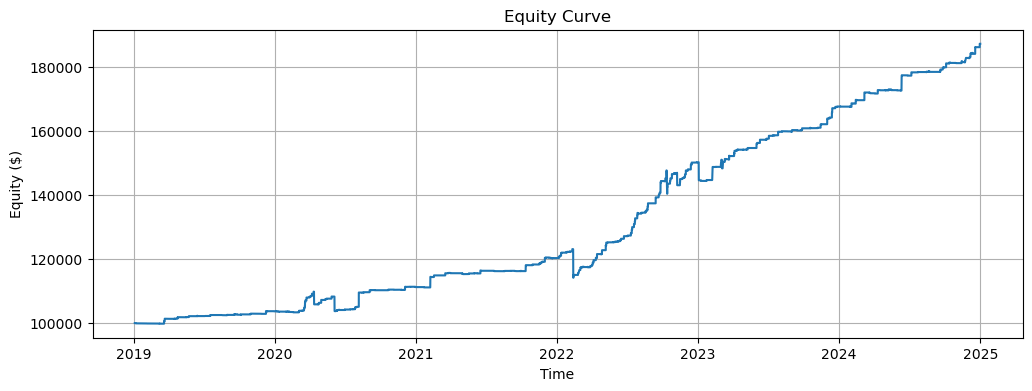

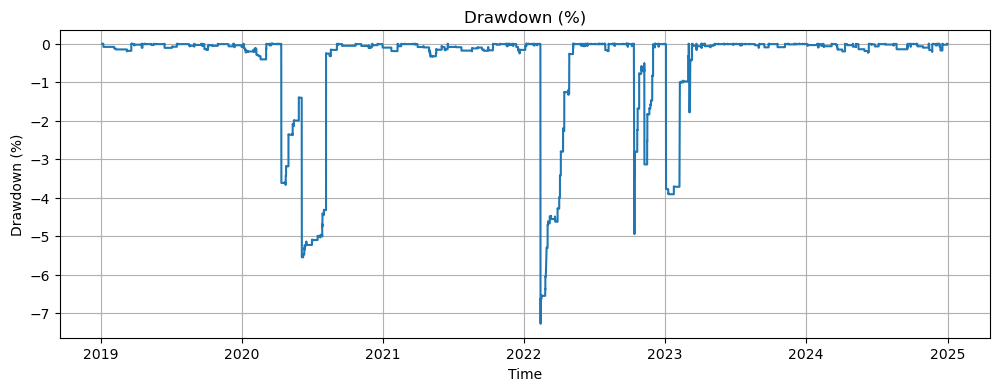

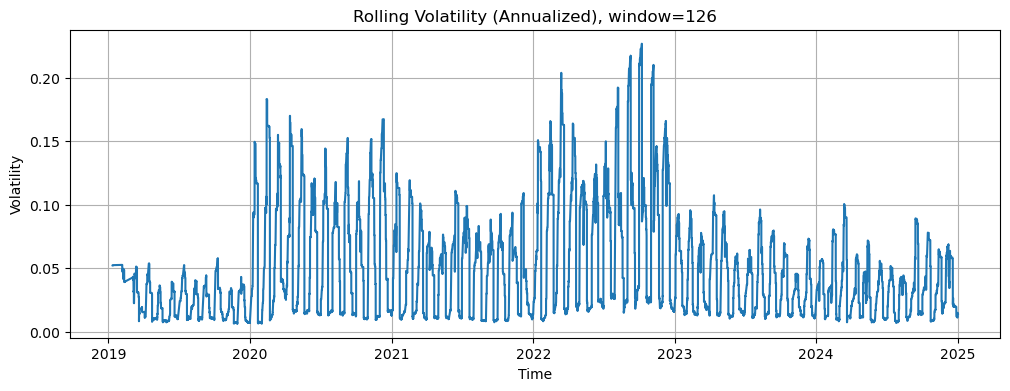

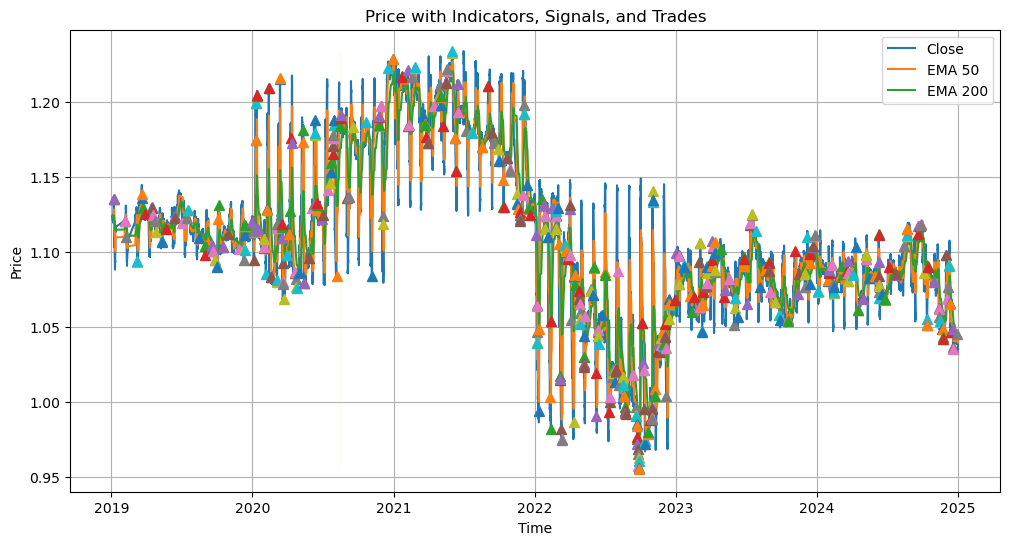

In [203]:
# ================= Diagnostics & Plots for backtesting.py =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True

# ---- 1) Pull useful internals ----
trades = stats.get("_trades", None)
equity_curve = stats.get("_equity_curve", None)  # index: DateTime; columns: ['Equity', 'Drawdown', ...] (depends on version)

# Graceful fallback if equity_curve missing: rebuild a minimal curve from stats (flat line won’t be useful for drawdown)
if equity_curve is None:
    # Try to reconstruct cumulative equity using provided metrics (approx)
    # Not perfect, but avoids hard failure if your backtesting.py version doesn’t expose _equity_curve.
    start_equity = bt._cash if hasattr(bt, "_cash") else 100_000
    # If total Return [%] available:
    total_ret_pct = stats.get("Return [%]", 0.0)
    equity_curve = pd.DataFrame(
        {"Equity": np.linspace(start_equity, start_equity * (1 + total_ret_pct / 100.0), len(df_bt))},
        index=df_bt.index
    )
    equity_curve["Peak"] = equity_curve["Equity"].cummax()
    equity_curve["Drawdown"] = equity_curve["Equity"] / equity_curve["Peak"] - 1.0

# Standardize columns if needed
if "Equity" not in equity_curve.columns:
    # Some versions name it 'Equity Final [$]' only at the end; then just map Close to a pseudo curve.
    equity_curve = equity_curve.rename(columns={equity_curve.columns[0]: "Equity"})
if "Drawdown" not in equity_curve.columns:
    equity_curve["Peak"] = equity_curve["Equity"].cummax()
    equity_curve["Drawdown"] = equity_curve["Equity"] / equity_curve["Peak"] - 1.0

# ---- 2) Performance metrics (concise) ----
perf_cols = [
    "Start", "End", "Duration", "Exposure Time [%]",
    "Return [%]", "Buy & Hold Return [%]",
    "Sharpe Ratio", "Sortino Ratio",
    "Calmar Ratio", "Max. Drawdown [%]",
    "Win Rate [%]", "# Trades", "Avg. Trade [%]", "Profit Factor"
]
perf = {}
for k in perf_cols:
    val = stats.get(k, None)
    if val is not None:
        perf[k] = val
perf_df = pd.DataFrame(perf, index=["Strategy"]).T
print("\n=== Performance Metrics ===")
print(perf_df)

# ---- 3) Equity curve ----
fig1, ax1 = plt.subplots()
ax1.plot(equity_curve.index, equity_curve["Equity"])
ax1.set_title("Equity Curve")
ax1.set_xlabel("Time")
ax1.set_ylabel("Equity ($)")
plt.show()

# ---- 4) Drawdown series ----
fig2, ax2 = plt.subplots()
ax2.plot(equity_curve.index, equity_curve["Drawdown"] * 100.0)
ax2.set_title("Drawdown (%)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Drawdown (%)")
plt.show()

# ---- 5) Rolling volatility (annualized) ----
# Use log returns of Close; adapt 'per_year' to your bar frequency (e.g., 252 daily, 365 for daily crypto, 78*252 for 5-min, etc.)
per_year = 252
ret = np.log(df_bt["Close"]).diff()
roll_win = per_year // 2 if per_year > 20 else 50  # default: half a year window
rolling_vol = ret.rolling(roll_win).std() * np.sqrt(per_year)

fig3, ax3 = plt.subplots()
ax3.plot(rolling_vol.index, rolling_vol)
ax3.set_title(f"Rolling Volatility (Annualized), window={roll_win}")
ax3.set_xlabel("Time")
ax3.set_ylabel("Volatility")
plt.show()

# ---- 6) Price + indicators + signals + trades ----
# Example indicators (customize as you like)
def ema(s, n): return s.ewm(span=n, adjust=False).mean()
def sma(s, n): return s.rolling(n).mean()

ema_fast = ema(df_bt["Close"], 50)
ema_slow = ema(df_bt["Close"], 200)
sig = df_bt["predicted_signal"].astype(int)

fig4, ax4 = plt.subplots(figsize=(12, 6))
ax4.plot(df_bt.index, df_bt["Close"], label="Close")
ax4.plot(df_bt.index, ema_fast, label="EMA 50")
ax4.plot(df_bt.index, ema_slow, label="EMA 200")

# Show long/short background regions from signal
# (Optional) Shade regions: +1 green, -1 red, 0 clear
state = sig.shift(1).fillna(0)  # position taken on close of prior bar
up = state == 1
dn = state == -1
ax4.fill_between(df_bt.index, df_bt["Close"].min(), df_bt["Close"].max(), where=up, alpha=0.06)
ax4.fill_between(df_bt.index, df_bt["Close"].min(), df_bt["Close"].max(), where=dn, alpha=0.06)

# Trade markers (if trades table available)
if isinstance(trades, pd.DataFrame) and not trades.empty:
    # Expect columns: EntryTime, ExitTime, EntryPrice, ExitPrice, Size, Direction/Side or similar
    # backtesting.py _trades usually has:
    # ['EntryTime', 'ExitTime', 'EntryPrice', 'ExitPrice', 'PnL', 'ReturnPct', 'Duration', 'Direction', ...]
    # We'll handle common variants.
    et_col = next((c for c in ["EntryTime", "Entry Bar", "Entry"] if c in trades.columns), None)
    ep_col = next((c for c in ["EntryPrice", "Entry Price"] if c in trades.columns), None)
    dir_col = next((c for c in ["Direction", "Side", "Signal"] if c in trades.columns), None)

    # Marker placement
    if et_col is not None and ep_col is not None:
        for _, tr in trades.iterrows():
            t = tr[et_col]
            p = tr[ep_col]
            # Align type
            if isinstance(t, (int, np.integer)):
                # If it's a bar index, map to timestamp
                if t >= 0 and t < len(df_bt.index):
                    t = df_bt.index[int(t)]
                else:
                    continue
            # Direction sign
            d = np.sign(tr.get(dir_col, 1)) if dir_col in trades.columns else 1
            # Use different marker for long/short
            if d >= 0:
                ax4.plot(t, p, marker="^", markersize=7)
            else:
                ax4.plot(t, p, marker="v", markersize=7)

ax4.set_title("Price with Indicators, Signals, and Trades")
ax4.set_xlabel("Time")
ax4.set_ylabel("Price")
ax4.legend(loc="best")
plt.show()

